# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
from scipy import stats 
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from catboost import CatBoostClassifier 
from lightgbm import LGBMClassifier 
from sklearn.model_selection import GridSearchCV

# PART ONE

Steps and tasks: [ Total Score: 25 points]

1. Import and warehouse data: [ Score: 3 points ]
    
• Import all the given datasets and explore shape and size.

• Merge all datasets onto one and explore final shape and size.

• Export the final dataset and store it on local machine in .csv, .xlsx and .json format for future use.

• Import the data from above steps into python.

In [2]:
df1=pd.read_json("Part1 - Car-Attributes.json")

In [3]:
df1.shape

(398, 8)

In [4]:
df2=pd.read_csv("Part1 - Car name.csv")

In [5]:
df2.shape

(398, 1)

In [6]:
df=df1

In [7]:
df['car_name']=df2

In [8]:
df

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [9]:
df.shape

(398, 9)

In [10]:
df.to_csv("mpg.csv",index=False)#store it on local machine in .csv format for future use

In [11]:
df.to_excel("mpg.xlsx",index=False)#store it on local machine in .xlsx format for future use

In [12]:
df.to_json ('mpg.json', orient='split')#store it on local machine in .json format for future use

2. Data cleansing: [ Score: 3 points ]
    
• Missing/incorrect value treatment

• Drop attribute/s if required using relevant functional knowledge

• Perform another kind of corrections/treatment on the data

In [13]:
df.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin', 'car_name'], dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_name  398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [15]:
df['mpg'].unique()

array([18. , 15. , 16. , 17. , 14. , 24. , 22. , 21. , 27. , 26. , 25. ,
       10. , 11. ,  9. , 28. , 19. , 12. , 13. , 23. , 30. , 31. , 35. ,
       20. , 29. , 32. , 33. , 17.5, 15.5, 14.5, 22.5, 24.5, 18.5, 29.5,
       26.5, 16.5, 31.5, 36. , 25.5, 33.5, 20.5, 30.5, 21.5, 43.1, 36.1,
       32.8, 39.4, 19.9, 19.4, 20.2, 19.2, 25.1, 20.6, 20.8, 18.6, 18.1,
       17.7, 27.5, 27.2, 30.9, 21.1, 23.2, 23.8, 23.9, 20.3, 21.6, 16.2,
       19.8, 22.3, 17.6, 18.2, 16.9, 31.9, 34.1, 35.7, 27.4, 25.4, 34.2,
       34.5, 31.8, 37.3, 28.4, 28.8, 26.8, 41.5, 38.1, 32.1, 37.2, 26.4,
       24.3, 19.1, 34.3, 29.8, 31.3, 37. , 32.2, 46.6, 27.9, 40.8, 44.3,
       43.4, 36.4, 44.6, 40.9, 33.8, 32.7, 23.7, 23.6, 32.4, 26.6, 25.8,
       23.5, 39.1, 39. , 35.1, 32.3, 37.7, 34.7, 34.4, 29.9, 33.7, 32.9,
       31.6, 28.1, 30.7, 24.2, 22.4, 34. , 38. , 44. ])

In [16]:
df['cyl'].unique()

array([8, 4, 6, 3, 5], dtype=int64)

In [17]:
df['disp'].unique()

array([307. , 350. , 318. , 304. , 302. , 429. , 454. , 440. , 455. ,
       390. , 383. , 340. , 400. , 113. , 198. , 199. , 200. ,  97. ,
       110. , 107. , 104. , 121. , 360. , 140. ,  98. , 232. , 225. ,
       250. , 351. , 258. , 122. , 116. ,  79. ,  88. ,  71. ,  72. ,
        91. ,  97.5,  70. , 120. ,  96. , 108. , 155. ,  68. , 114. ,
       156. ,  76. ,  83. ,  90. , 231. , 262. , 134. , 119. , 171. ,
       115. , 101. , 305. ,  85. , 130. , 168. , 111. , 260. , 151. ,
       146. ,  80. ,  78. , 105. , 131. , 163. ,  89. , 267. ,  86. ,
       183. , 141. , 173. , 135. ,  81. , 100. , 145. , 112. , 181. ,
       144. ])

In [18]:
df['hp'].unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160, 95, 97, 85,
       88, 46, 87, 90, 113, 200, 210, 193, '?', 100, 105, 175, 153, 180,
       110, 72, 86, 70, 76, 65, 69, 60, 80, 54, 208, 155, 112, 92, 145,
       137, 158, 167, 94, 107, 230, 49, 75, 91, 122, 67, 83, 78, 52, 61,
       93, 148, 129, 96, 71, 98, 115, 53, 81, 79, 120, 152, 102, 108, 68,
       58, 149, 89, 63, 48, 66, 139, 103, 125, 133, 138, 135, 142, 77, 62,
       132, 84, 64, 74, 116, 82], dtype=object)

In [19]:
df['wt'].unique()

array([3504, 3693, 3436, 3433, 3449, 4341, 4354, 4312, 4425, 3850, 3563,
       3609, 3761, 3086, 2372, 2833, 2774, 2587, 2130, 1835, 2672, 2430,
       2375, 2234, 2648, 4615, 4376, 4382, 4732, 2264, 2228, 2046, 2634,
       3439, 3329, 3302, 3288, 4209, 4464, 4154, 4096, 4955, 4746, 5140,
       2962, 2408, 3282, 3139, 2220, 2123, 2074, 2065, 1773, 1613, 1834,
       1955, 2278, 2126, 2254, 2226, 4274, 4385, 4135, 4129, 3672, 4633,
       4502, 4456, 4422, 2330, 3892, 4098, 4294, 4077, 2933, 2511, 2979,
       2189, 2395, 2288, 2506, 2164, 2100, 4100, 3988, 4042, 3777, 4952,
       4363, 4237, 4735, 4951, 3821, 3121, 3278, 2945, 3021, 2904, 1950,
       4997, 4906, 4654, 4499, 2789, 2279, 2401, 2379, 2124, 2310, 2472,
       2265, 4082, 4278, 1867, 2158, 2582, 2868, 3399, 2660, 2807, 3664,
       3102, 2875, 2901, 3336, 2451, 1836, 2542, 3781, 3632, 3613, 4141,
       4699, 4457, 4638, 4257, 2219, 1963, 2300, 1649, 2003, 2125, 2108,
       2246, 2489, 2391, 2000, 3264, 3459, 3432, 31

In [20]:
df['acc'].unique()

array([12. , 11.5, 11. , 10.5, 10. ,  9. ,  8.5,  8. ,  9.5, 15. , 15.5,
       16. , 14.5, 20.5, 17.5, 12.5, 14. , 13.5, 18.5, 19. , 13. , 19.5,
       18. , 17. , 23.5, 16.5, 21. , 16.9, 14.9, 17.7, 15.3, 13.9, 12.8,
       15.4, 17.6, 22.2, 22.1, 14.2, 17.4, 16.2, 17.8, 12.2, 16.4, 13.6,
       15.7, 13.2, 21.9, 16.7, 12.1, 14.8, 18.6, 16.8, 13.7, 11.1, 11.4,
       18.2, 15.8, 15.9, 14.1, 21.5, 14.4, 19.4, 19.2, 17.2, 18.7, 15.1,
       13.4, 11.2, 14.7, 16.6, 17.3, 15.2, 14.3, 20.1, 24.8, 11.3, 12.9,
       18.8, 18.1, 17.9, 21.7, 23.7, 19.9, 21.8, 13.8, 12.6, 16.1, 20.7,
       18.3, 20.4, 19.6, 17.1, 15.6, 24.6, 11.6])

In [21]:
df['yr'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=int64)

In [22]:
df['origin'].unique()

array([1, 3, 2], dtype=int64)

we can find '?' in hp column

In [23]:
df['hp']=df['hp'].replace('?',0) #replaced ? data with 0 value

In [24]:
df['hp'].unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160,  95,  97,
        85,  88,  46,  87,  90, 113, 200, 210, 193,   0, 100, 105, 175,
       153, 180, 110,  72,  86,  70,  76,  65,  69,  60,  80,  54, 208,
       155, 112,  92, 145, 137, 158, 167,  94, 107, 230,  49,  75,  91,
       122,  67,  83,  78,  52,  61,  93, 148, 129,  96,  71,  98, 115,
        53,  81,  79, 120, 152, 102, 108,  68,  58, 149,  89,  63,  48,
        66, 139, 103, 125, 133, 138, 135, 142,  77,  62, 132,  84,  64,
        74, 116,  82], dtype=int64)

In [25]:
df.isnull().sum()#checking whether dataset has null values and getting count of null values if any

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car_name    0
dtype: int64

3. Data analysis & visualisation: [ Score: 4 points ]
    
• Perform detailed statistical analysis on the data.

• Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.

Hint: Use your best analytical approach. Even you can mix match columns to create new columns which can be used for better analysis. Create
your own features if required. Be highly experimental and analytical here to find hidden patterns.


In [26]:
#statistical Analysis
df.describe()

,mpg,cyl,disp,hp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,102.894472,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,40.269544,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,0.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


# Univariate Analysis

In [27]:
sns.set_style("whitegrid")# setting plot style

In [28]:
sns.set_palette("viridis")#setting plot color palette

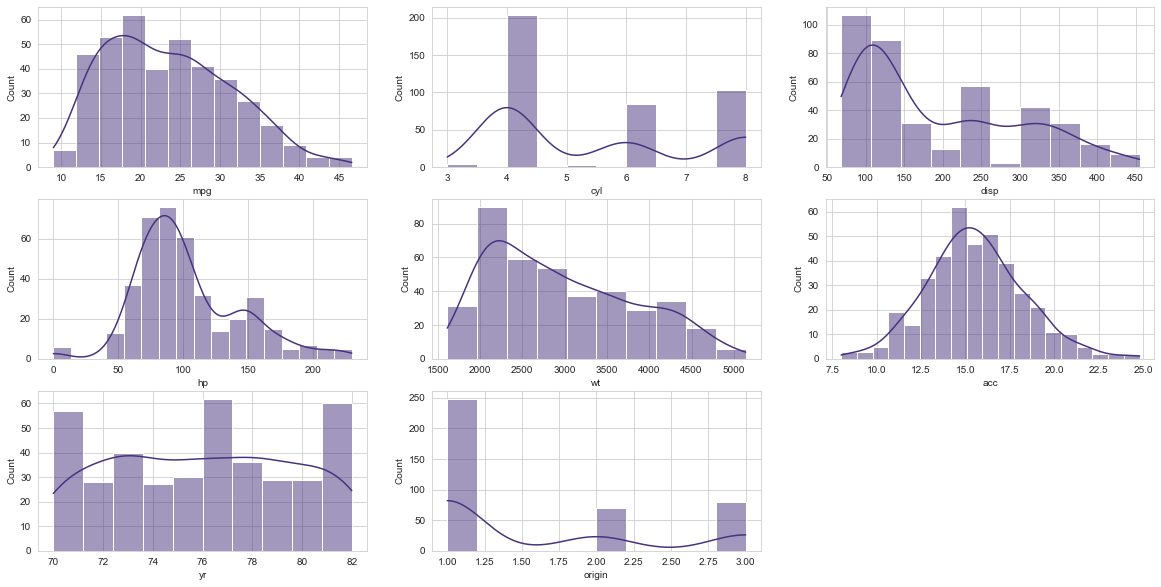

In [29]:
plt.figure(figsize=(20,10))
plt.subplot(3,3,1)
sns.histplot(df,x='mpg',kde=True)
plt.subplot(3,3,2)
sns.histplot(df,x='cyl',kde=True )
plt.subplot(3,3,3)
sns.histplot(df,x='disp' ,kde=True )
plt.subplot(3,3,4)
sns.histplot(df,x='hp' ,kde=True )
plt.subplot(3,3,5)
sns.histplot(df,x='wt' ,kde=True )
plt.subplot(3,3,6)
sns.histplot(df,x='acc' ,kde=True )
plt.subplot(3,3,7)
sns.histplot(df,x='yr' ,kde=True )
plt.subplot(3,3,8)
sns.histplot(df,x='origin' ,kde=True )
plt.show()

# Conclusions on Univariate Analysis

1.Maximum no of cars have mpg of 20.

2.Maximum no of cars have 4 cyl.

3.Maximum no of cars have 100 disp.

4.Maximum no of cars have 90 hp.

5.Maximum no of cars have 2000 wt.

6.Maximum no of cars have 15 acc.

7.Maximum no of cars have model year 76.

8.Maximum no of cars have orgin from 1.

# Bivariate Analysis

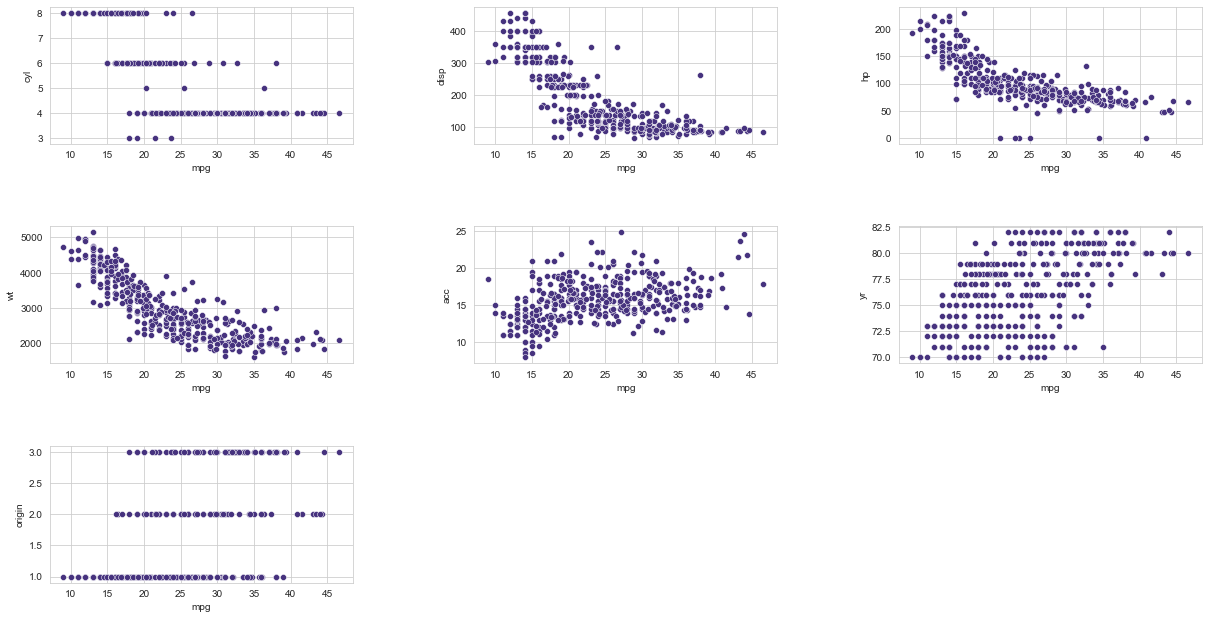

In [30]:
plt.figure(figsize=(20,10))
plt.subplot(3,3,1)
sns.scatterplot(data=df,x='mpg',y='cyl')
plt.subplot(3,3,2)
sns.scatterplot(data=df,x='mpg',y='disp')
plt.subplot(3,3,3)
sns.scatterplot(data=df,x='mpg' ,y='hp')
plt.subplot(3,3,4)
sns.scatterplot(data=df,x='mpg' ,y='wt')
plt.subplot(3,3,5)
sns.scatterplot(data=df,x='mpg' ,y='acc')
plt.subplot(3,3,6)
sns.scatterplot(data=df,x='mpg' ,y='yr')
plt.subplot(3,3,7)
sns.scatterplot(data=df,x='mpg' ,y='origin')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.6)
plt.show()

# Conclusions on Bi-variate analysis

1.Higher the number of cyl lower the mpg.

2.Higher the disp lower the mpg.

3.Higher the hp lower the mpg.

4.Higher the wt lower the mpg.

5.Higher the acc higher the mpg.

6.Higher the yr higher the mpg.

7.Higher origin has higher mpg.

# Multivariant Analysis

In [31]:
df.corr()

,mpg,cyl,disp,hp,wt,acc,yr,origin
mpg,1.000000,-0.775396,-0.804203,-0.754276,-0.831741,0.420289,0.579267,0.563450
cyl,-0.775396,1.000000,0.950721,0.821656,0.896017,-0.505419,-0.348746,-0.562543
disp,-0.804203,0.950721,1.000000,0.871927,0.932824,-0.543684,-0.370164,-0.609409
hp,-0.754276,0.821656,0.871927,1.000000,0.837987,-0.673940,-0.411587,-0.418636
wt,-0.831741,0.896017,0.932824,0.837987,1.000000,-0.417457,-0.306564,-0.581024
acc,0.420289,-0.505419,-0.543684,-0.673940,-0.417457,1.000000,0.288137,0.205873
yr,0.579267,-0.348746,-0.370164,-0.411587,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.418636,-0.581024,0.205873,0.180662,1.000000


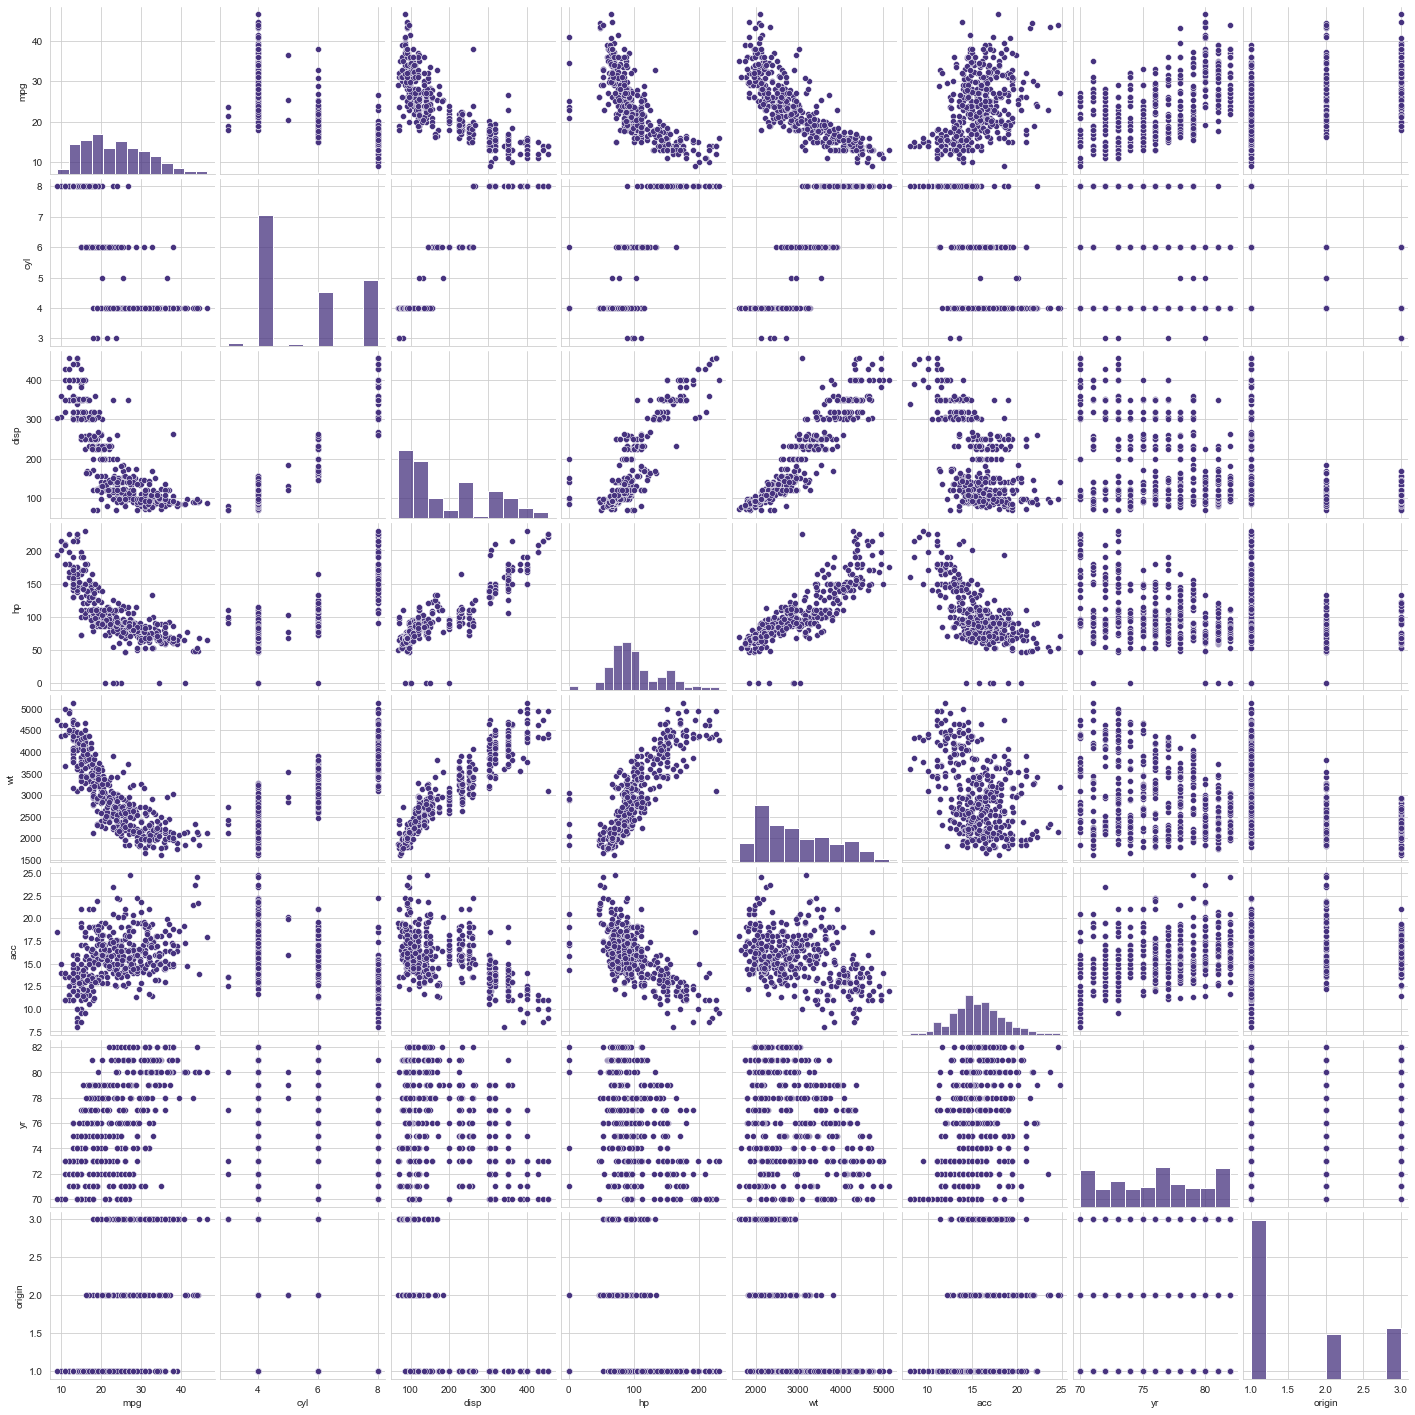

In [32]:
sns.pairplot(df)

<AxesSubplot:>

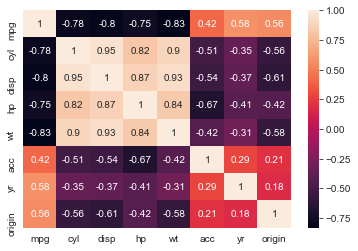

In [33]:
sns.heatmap(df.corr(), annot=True)  # plot the correlation coefficients as a heatmap

4. Machine learning: [ Score: 8 points ]
    
• Use K Means and Hierarchical clustering to find out the optimal number of clusters in the data.

• Share your insights about the difference in using these two methods. 

In [34]:
#standardization of data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [35]:
df_std = pd.DataFrame(StandardScaler().fit_transform(df.iloc[:,:-1]))

In [36]:
df_std

,0,1,2,3,4,5,6,7
0,-0.706439,1.498191,1.090604,0.673950,0.630870,-1.295498,-1.627426,-0.715145
1,-1.090751,1.498191,1.503514,1.544187,0.854333,-1.477038,-1.627426,-0.715145
2,-0.706439,1.498191,1.196232,1.171228,0.550470,-1.658577,-1.627426,-0.715145
3,-0.962647,1.498191,1.061796,1.171228,0.546923,-1.295498,-1.627426,-0.715145
4,-0.834543,1.498191,1.042591,0.922589,0.565841,-1.840117,-1.627426,-0.715145
...,...,...,...,...,...,...,...,...
393,0.446497,-0.856321,-0.513026,-0.420063,-0.213324,0.011586,1.621983,-0.715145
394,2.624265,-0.856321,-0.925936,-1.265436,-0.993671,3.279296,1.621983,0.533222
395,1.087017,-0.856321,-0.561039,-0.469791,-0.798585,-1.440730,1.621983,-0.715145
396,0.574601,-0.856321,-0.705077,-0.594110,-0.408411,1.100822,1.621983,-0.715145


In [37]:
df1=df.iloc[:,:-1]

In [38]:
t=df1.columns

In [39]:
t

Index(['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin'], dtype='object')

In [40]:
df_std.columns=t

# Creating Clusters using KMeans

Forming 2 Clusters with K=2

In [41]:
# Create K Means cluster and store the result in the object k_means
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters = 2)

In [42]:
# Fit K means on the scaled_df
k_means.fit(df_std)

KMeans(n_clusters=2)

# Cluster Output for all the observations

In [43]:
# Get the labels
k_means.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,

# Within Cluster Sum of Squares

In [44]:
k_means.inertia_

1592.7273510695675

# Forming clusters with K = 1,3,4,5,6 and comparing the WSS

In [45]:
k_means = KMeans(n_clusters = 3)
k_means.fit(df_std)
k_means.inertia_

1209.3108928331483

In [46]:
k_means = KMeans(n_clusters = 4)
k_means.fit(df_std)
k_means.inertia_

1002.5968287039991

In [47]:
k_means = KMeans(n_clusters = 5)
k_means.fit(df_std)
k_means.inertia_

845.3017838020864

In [48]:
k_means = KMeans(n_clusters = 6)
k_means.fit(df_std)
k_means.inertia_

764.6700639128803

In [49]:
k_means = KMeans(n_clusters = 1)
k_means.fit(df_std)
k_means.inertia_

3184.0

# Calculating WSS for other values of K - Elbow Method

In [50]:
wss =[] 

In [51]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(df_std)
    wss.append(KM.inertia_)

In [52]:
wss

[3184.0,
 1592.7273510695675,
 1209.2934142117433,
 1002.5968287039991,
 845.3017838020864,
 764.6774676072117,
 697.6844328330194,
 648.2649679686391,
 606.956023083643,
 577.1739154596509]

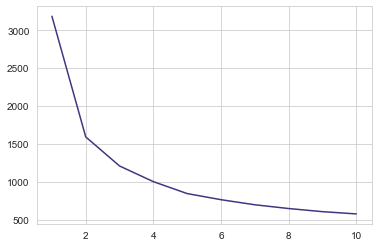

In [53]:
plt.plot(range(1,11), wss)

# KMeans with K=4

In [54]:
k_means = KMeans(n_clusters = 4)
k_means.fit(df_std)
k_means.inertia_

1002.5968287039991

In [55]:
labels = k_means.labels_

# Cluster evaluation for 3 clusters: the silhouette score

In [56]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [57]:
# Calculating silhouette_score
silhouette_score(df_std,labels)

0.3101622834969473

# KMeans with K=5

In [58]:
k_means = KMeans(n_clusters = 5,random_state=0)
k_means.fit(df_std)
labels1 = k_means.labels_

# Cluster evaluation for 5 clusters

In [59]:
silhouette_score(df_std,labels)

0.3101622834969473

# KMeans with K=6

In [60]:
k_means = KMeans(n_clusters = 6,random_state=0)
k_means.fit(df_std)
labels = k_means.labels_

# Cluster evaluation for 6 clusters

In [61]:
silhouette_score(df_std,labels)

0.3326786741990461

silhouette score is better for 5 clusters than for 4 clusters. So, final clusters will be 5

Appending Clusters to the original dataset

In [62]:
df["Clus_kmeans5"] = labels1
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name,Clus_kmeans5
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0


In [63]:
df["Clus_kmeans5"].value_counts()

0    94
4    84
3    81
1    72
2    67
Name: Clus_kmeans5, dtype: int64

# Hierarchial Cluster

# Creating the Dendrogram

# Importing dendrogram and linkage module

In [64]:
from scipy.cluster.hierarchy import dendrogram, linkage,cophenet

In [65]:
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

# Choosing average linkage method

In [66]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(df_std, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(df_std))

c

0.6992130571092467

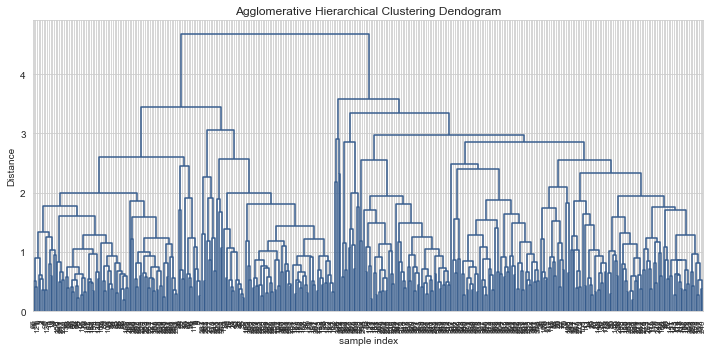

In [67]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [68]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(df_std, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(df_std))

c

0.7248712337639545

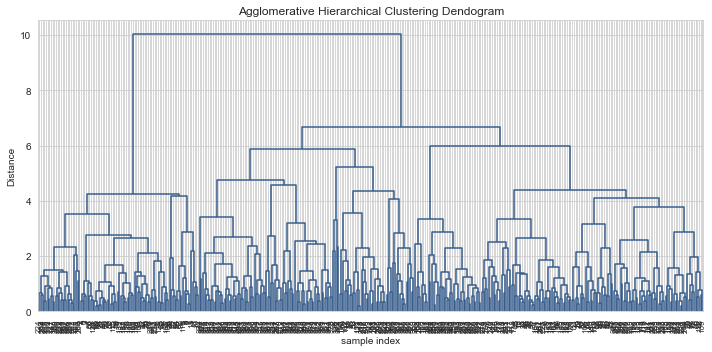

In [69]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [70]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(df_std, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(df_std))

c

0.6804516453841263

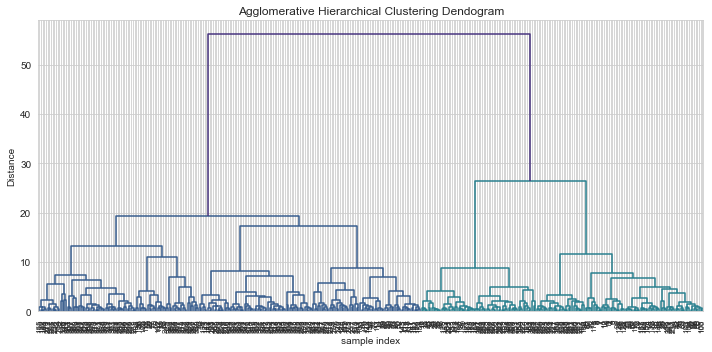

In [71]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

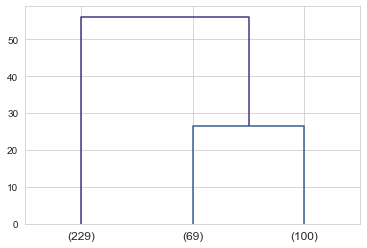

In [72]:
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

In [73]:

Z = linkage(df_std, metric='euclidean', method='centroid')
c, coph_dists = cophenet(Z , pdist(df_std))

c

0.7479268115609967

In [74]:
from scipy.cluster import hierarchy

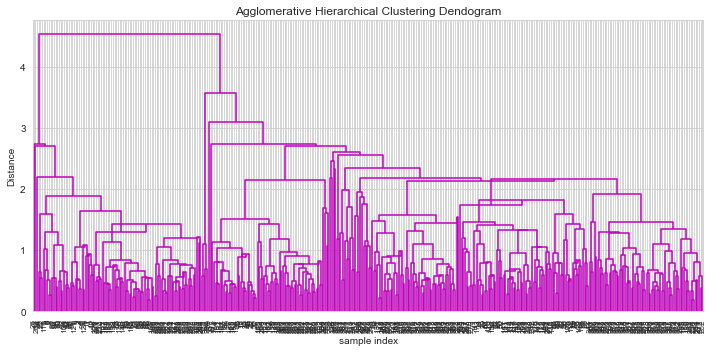

In [75]:

plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
hierarchy.set_link_color_palette(['m', 'c', 'y', 'k'])
hierarchy.dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )

plt.tight_layout()

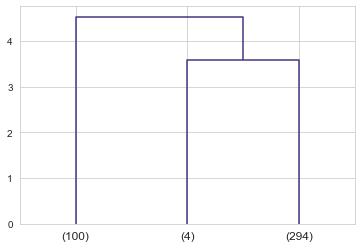

In [76]:
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

From above dendogram we can derive no of clusters is 3

In [77]:
max_d =4

In [78]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,

In [79]:
df1=df

In [80]:
df1['clusters'] = clusters

In [81]:
df1

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name,Clus_kmeans5,clusters
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0,1
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0,1
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0,1
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0,1
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0,1
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,2,2
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,1,2
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,2,2
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,2,2


In [82]:
df1.clusters.value_counts().sort_index()

1    100
2    298
Name: clusters, dtype: int64

In [83]:
df1.Clus_kmeans5.value_counts().sort_index()

0    94
1    72
2    67
3    81
4    84
Name: Clus_kmeans5, dtype: int64

In [84]:
aggdata=df1.iloc[:,:].groupby('clusters').mean()
aggdata['Freq']=df1.clusters.value_counts().sort_index()
aggdata

,mpg,cyl,disp,hp,wt,acc,yr,origin,Clus_kmeans5,Freq
clusters,,,,,,,,,,
1,14.684000,7.980000,345.470000,160.400000,4121.560000,12.702000,73.740000,1.000000,0.180000,100
2,26.477852,4.607383,142.404362,83.597315,2584.137584,16.529866,76.771812,1.765101,2.573826,298


# Insights about the difference in using these two methods

# Hierarchical clustering category

Cluster 1: Automobile with lower mpg

Cluster 2: Automobile with higher mpg


In [85]:
aggdata=df1.iloc[:,:].groupby('Clus_kmeans5').mean()
aggdata['Freq']=df1.Clus_kmeans5.value_counts().sort_index()
aggdata

,mpg,cyl,disp,hp,wt,acc,yr,origin,clusters,Freq
Clus_kmeans5,,,,,,,,,,
0,14.429787,8.000000,350.042553,162.393617,4157.978723,12.576596,73.468085,1.000000,1.000000,94
1,34.137500,4.083333,99.527778,70.277778,2155.819444,16.734722,79.416667,2.763889,2.000000,72
2,28.791045,4.194030,132.567164,80.074627,2563.805970,16.549254,79.671642,1.074627,2.000000,67
3,19.104938,6.222222,233.444444,100.728395,3298.580247,16.632099,75.703704,1.037037,1.925926,81
4,24.619048,4.047619,108.601190,84.559524,2347.619048,16.107143,73.309524,2.107143,2.000000,84


# kmeans clustering

MPG rating:
    
Cluster 0: automobiles with lower mpg (mpg rating-1)
    
Cluster 1: mpg rating-5
    
Cluster 2:mpg rating-4
    
Cluster 3:mpg rating-2
    
Cluster 4:mpg rating-3
    
mpg rating ranges from 1 to 5 highest-5.

Difference between both clusters:
    Hiearchrical clustering would take time for  larger dataset whereas k-means is time efficient.
    Hierarchical cluster consolidated it to two clusters whereas kmeans seems to be efficient and suitable for this usecase

# 5. Answer below questions based on outcomes of using ML based methods. [ Score: 5 points ]
• Mention how many optimal clusters are present in the data and what could be the possible reason behind it.
• Use linear regression model on different clusters separately and print the coefficients of the models individually
• How using different models for different clusters will be helpful in this case and how it will be different than using one single model without
clustering? Mention how it impacts performance and prediction.

Mention how many optimal clusters are present in the data-5 clusters with different mpg  and optimal clusters is k-means

Linear regression model

In [86]:
ans = [pd.DataFrame(y) for x, y in df1.groupby('Clus_kmeans5', as_index=False)]

In [87]:
cluster0=ans[0]

In [88]:
cluster1=ans[1]

In [89]:
cluster2=ans[2]

In [90]:
cluster3=ans[3]

In [91]:
cluster4=ans[4]

In [92]:
cluster0.shape

(94, 11)

In [93]:
cluster1.shape

(72, 11)

# linear regression model on cluster 0

In [94]:
from sklearn.linear_model import LinearRegression

In [95]:
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function

In [96]:
from sklearn.metrics import mean_squared_error

In [97]:

# lets build our linear model
# independant variables
X = cluster0.drop(['mpg','car_name','clusters','Clus_kmeans5'], axis=1)
# the dependent variable
y = cluster0[['mpg']]

In [98]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [99]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [100]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is 0.0
The coefficient for disp is 0.0004056002408129704
The coefficient for hp is -0.03411653918723397
The coefficient for wt is -0.0012923053815034136
The coefficient for acc is -0.47408242867061984
The coefficient for yr is 0.3112208445732607
The coefficient for origin is 0.0


In [101]:
pred=regression_model.predict(X_test)

In [102]:
regression_model.score(X_test,y_test)

0.312251830137814

In [103]:
mean_squared_error(y_test,pred)

2.823905434294062

# linear regression model on cluster 1

In [104]:
# lets build our linear model
# independant variables
X = cluster1.drop(['mpg','car_name','clusters','Clus_kmeans5'], axis=1)
# the dependent variable
y = cluster1[['mpg']]

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [106]:
regression_model.fit(X_train, y_train)

LinearRegression()

In [107]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is 0.5947488064219881
The coefficient for disp is 0.08462504906637969
The coefficient for hp is -0.1403526150222747
The coefficient for wt is -0.0028263609036010074
The coefficient for acc is 0.5683577385748306
The coefficient for yr is 0.9384718232414886
The coefficient for origin is -1.9724229751576177


In [108]:
pred=regression_model.predict(X_test)

In [109]:
regression_model.score(X_test,y_test)

-0.08407689105778227

In [110]:
mean_squared_error(y_test,pred)

32.6313415727597

# linear regression model on cluster 2

In [111]:
# lets build our linear model
# independant variables
X = cluster2.drop(['mpg','car_name','clusters','Clus_kmeans5'], axis=1)
# the dependent variable
y = cluster2[['mpg']]

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [113]:
regression_model.fit(X_train, y_train)

LinearRegression()

In [114]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is 0.6281951037515162
The coefficient for disp is -0.08640460114659537
The coefficient for hp is 0.01607373362584729
The coefficient for wt is -0.006021995353667598
The coefficient for acc is -0.5720667024124048
The coefficient for yr is 0.8092835433353144
The coefficient for origin is 9.520040396744621


In [115]:
pred=regression_model.predict(X_test)

In [116]:
regression_model.score(X_test,y_test)

-0.7080745671547446

In [117]:
mean_squared_error(y_test,pred)

25.99836672237983

# linear regression model on cluster 3

In [118]:
# lets build our linear model
# independant variables
X = cluster3.drop(['mpg','car_name','clusters','Clus_kmeans5'], axis=1)
# the dependent variable
y = cluster3[['mpg']]

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [120]:
regression_model.fit(X_train, y_train)

LinearRegression()

In [121]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is 1.435454998267033
The coefficient for disp is -0.0006725808495006391
The coefficient for hp is -0.008915451736966581
The coefficient for wt is -0.004097558759564975
The coefficient for acc is 0.05560211497991464
The coefficient for yr is 0.3059822237886908
The coefficient for origin is -2.5640116208030497


In [122]:
pred=regression_model.predict(X_test)

In [123]:
regression_model.score(X_test,y_test)

0.27141560956234734

In [124]:
mean_squared_error(y_test,pred)

2.617028501051059

# linear regression model on cluster 4

In [125]:
# lets build our linear model
# independant variables
X = cluster4.drop(['mpg','car_name','clusters','Clus_kmeans5'], axis=1)
# the dependent variable
y = cluster4[['mpg']]

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [127]:
regression_model.fit(X_train, y_train)

LinearRegression()

In [128]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is 1.8515544328528852
The coefficient for disp is -0.011942913387323867
The coefficient for hp is -0.04269998574988186
The coefficient for wt is -0.006845016484385655
The coefficient for acc is -0.0852624372719127
The coefficient for yr is 0.016441840036260567
The coefficient for origin is 0.6185762223736582


In [129]:
pred=regression_model.predict(X_test)

In [130]:
regression_model.score(X_test,y_test)

0.11987061865883597

In [131]:
mean_squared_error(y_test,pred)

9.027419362156214

# linear regression model on full dataset

In [132]:
df_std

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,-0.706439,1.498191,1.090604,0.673950,0.630870,-1.295498,-1.627426,-0.715145
1,-1.090751,1.498191,1.503514,1.544187,0.854333,-1.477038,-1.627426,-0.715145
2,-0.706439,1.498191,1.196232,1.171228,0.550470,-1.658577,-1.627426,-0.715145
3,-0.962647,1.498191,1.061796,1.171228,0.546923,-1.295498,-1.627426,-0.715145
4,-0.834543,1.498191,1.042591,0.922589,0.565841,-1.840117,-1.627426,-0.715145
...,...,...,...,...,...,...,...,...
393,0.446497,-0.856321,-0.513026,-0.420063,-0.213324,0.011586,1.621983,-0.715145
394,2.624265,-0.856321,-0.925936,-1.265436,-0.993671,3.279296,1.621983,0.533222
395,1.087017,-0.856321,-0.561039,-0.469791,-0.798585,-1.440730,1.621983,-0.715145
396,0.574601,-0.856321,-0.705077,-0.594110,-0.408411,1.100822,1.621983,-0.715145


In [133]:
# lets build our linear model
# independant variables
X = df_std.drop(['mpg'], axis=1)
# the dependent variable
y = df_std[['mpg']]

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [135]:
regression_model.fit(X_train, y_train)

LinearRegression()

In [136]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is -0.08541454152062915
The coefficient for disp is 0.295571721294137
The coefficient for hp is -0.05237669744503227
The coefficient for wt is -0.7886192000153428
The coefficient for acc is 0.03574208853215081
The coefficient for yr is 0.3776971652947724
The coefficient for origin is 0.12148594194925269


In [137]:
pred=regression_model.predict(X_test)

In [138]:
mean_squared_error(y_test,pred)

0.14453299858925478

# Conclusions:
    Applying different models in different clusters will improve the predictions and accuracy.

# Improvisation: [ Score: 2 points ]
• Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the company to
perform a better data analysis in future.

-Collect more data points for clusters 2 and 1 will improve accuracy and predictions.

-Please include type of automobiles based on this comparison would be better.

# PART  TWO

# • #DOMAIN: Manufacturing
• #CONTEXT: Company X curates and packages wine across various vineyards spread throughout the country.
• #DATA DESCRIPTION: The data concerns the chemical composition of the wine and its respective quality.
#Attribute Information:
1. A, B, C, D: specific chemical composition measure of the wine
2. Quality: quality of wine [ Low and High ]
• #PROJECT OBJECTIVE: Goal is to build a synthetic data generation model using the existing data provided by the company.

In [139]:
df=pd.read_excel("Part2 - Company.xlsx")

In [140]:
df1=df.iloc[:,:-1]

In [141]:
df1

,A,B,C,D
0,47,27,45,108
1,174,133,134,166
2,159,163,135,131
3,61,23,3,44
4,59,60,9,68
...,...,...,...,...
56,200,186,185,179
57,137,182,165,199
58,88,39,9,102
59,180,157,192,198


In [142]:
k_means = KMeans(n_clusters =2,random_state=0)
k_means.fit(df1)
labels1 = k_means.labels_

In [143]:
silhouette_score(df1,labels1)

0.6898866592114928

In [144]:
df["pred"] = labels1

In [145]:
df

,A,B,C,D,Quality,pred
0,47,27,45,108,Quality A,0
1,174,133,134,166,Quality B,1
2,159,163,135,131,NaN,1
3,61,23,3,44,Quality A,0
4,59,60,9,68,Quality A,0
...,...,...,...,...,...,...
56,200,186,185,179,Quality B,1
57,137,182,165,199,NaN,1
58,88,39,9,102,NaN,0
59,180,157,192,198,NaN,1


In [146]:
df['pred'].replace({0:'Quality A', 1:'Quality B'}, inplace=True)

In [147]:
df

,A,B,C,D,Quality,pred
0,47,27,45,108,Quality A,Quality A
1,174,133,134,166,Quality B,Quality B
2,159,163,135,131,NaN,Quality B
3,61,23,3,44,Quality A,Quality A
4,59,60,9,68,Quality A,Quality A
...,...,...,...,...,...,...
56,200,186,185,179,Quality B,Quality B
57,137,182,165,199,NaN,Quality B
58,88,39,9,102,NaN,Quality A
59,180,157,192,198,NaN,Quality B


In [148]:
df.loc[df['Quality'].isnull(),'Quality'] = df['pred'] #replace nan values with pred values

In [149]:
df

,A,B,C,D,Quality,pred
0,47,27,45,108,Quality A,Quality A
1,174,133,134,166,Quality B,Quality B
2,159,163,135,131,Quality B,Quality B
3,61,23,3,44,Quality A,Quality A
4,59,60,9,68,Quality A,Quality A
...,...,...,...,...,...,...
56,200,186,185,179,Quality B,Quality B
57,137,182,165,199,Quality B,Quality B
58,88,39,9,102,Quality A,Quality A
59,180,157,192,198,Quality B,Quality B


In [150]:
df.pop('pred')

0     Quality A
1     Quality B
2     Quality B
3     Quality A
4     Quality A
        ...    
56    Quality B
57    Quality B
58    Quality A
59    Quality B
60    Quality B
Name: pred, Length: 61, dtype: object

In [151]:
#Final synthetic dataframe
df

,A,B,C,D,Quality
0,47,27,45,108,Quality A
1,174,133,134,166,Quality B
2,159,163,135,131,Quality B
3,61,23,3,44,Quality A
4,59,60,9,68,Quality A
...,...,...,...,...,...
56,200,186,185,179,Quality B
57,137,182,165,199,Quality B
58,88,39,9,102,Quality A
59,180,157,192,198,Quality B


# PART THREE

• DOMAIN: Automobile
• CONTEXT: The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette.
The vehicle may be viewed from one of many different angles.
• DATA DESCRIPTION: The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles
were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of
vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more
difficult to distinguish between the cars.
• All the features are numeric i.e. geometric features extracted from the silhouette

• PROJECT OBJECTIVE: Apply dimensionality reduction technique – PCA and train a model using principal components instead of training the
model using just the raw data.
Steps and tasks: [ Total Score: 20 points]
1. Data: Import, clean and pre-process the data

In [152]:
df = pd.read_csv("Part3 - vehicle.csv")

In [153]:
df.shape

(846, 19)

In [154]:
df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39.0,87.0,183.0,64.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195,car
842,89,46.0,84.0,163.0,66.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197,van
843,106,54.0,101.0,222.0,67.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201,car
844,86,36.0,78.0,146.0,58.0,7,135.0,50.0,18.0,124,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195,car


In [155]:
df.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [157]:
df=df.dropna() #dropping null value

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  813 non-null    int64  
 1   circularity                  813 non-null    float64
 2   distance_circularity         813 non-null    float64
 3   radius_ratio                 813 non-null    float64
 4   pr.axis_aspect_ratio         813 non-null    float64
 5   max.length_aspect_ratio      813 non-null    int64  
 6   scatter_ratio                813 non-null    float64
 7   elongatedness                813 non-null    float64
 8   pr.axis_rectangularity       813 non-null    float64
 9   max.length_rectangularity    813 non-null    int64  
 10  scaled_variance              813 non-null    float64
 11  scaled_variance.1            813 non-null    float64
 12  scaled_radius_of_gyration    813 non-null    float64
 13  scaled_radius_of_gyr

2. EDA and visualisation: Create a detailed performance report using univariate, bi-variate and multivariate EDA techniques. Find out all possible hidden
patterns by using all possible methods.

In [159]:
#statistical Analysis
df.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,813.000000,813.000000,813.00000,813.000000,813.000000,813.000000,813.000000,813.00000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000
mean,93.656827,44.803198,82.04305,169.098401,61.774908,8.599016,168.563346,40.98893,20.558426,147.891759,188.377614,438.382534,174.252153,72.399754,6.351784,12.687577,188.979090,195.729397
std,8.233751,6.146659,15.78307,33.615402,7.973000,4.677174,33.082186,7.80338,2.573184,14.504648,31.165873,175.270368,32.332161,7.475994,4.921476,8.926951,6.153681,7.398781
min,73.000000,33.000000,40.00000,104.000000,47.000000,2.000000,112.000000,26.00000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.00000,141.000000,57.000000,7.000000,146.000000,33.00000,19.000000,137.000000,167.000000,318.000000,149.000000,67.000000,2.000000,6.000000,184.000000,191.000000
50%,93.000000,44.000000,79.00000,167.000000,61.000000,8.000000,157.000000,43.00000,20.000000,146.000000,179.000000,364.000000,173.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,100.000000,49.000000,98.00000,195.000000,65.000000,10.000000,198.000000,46.00000,23.000000,159.000000,217.000000,586.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.00000,333.000000,138.000000,55.000000,265.000000,61.00000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


# Univariate Analysis

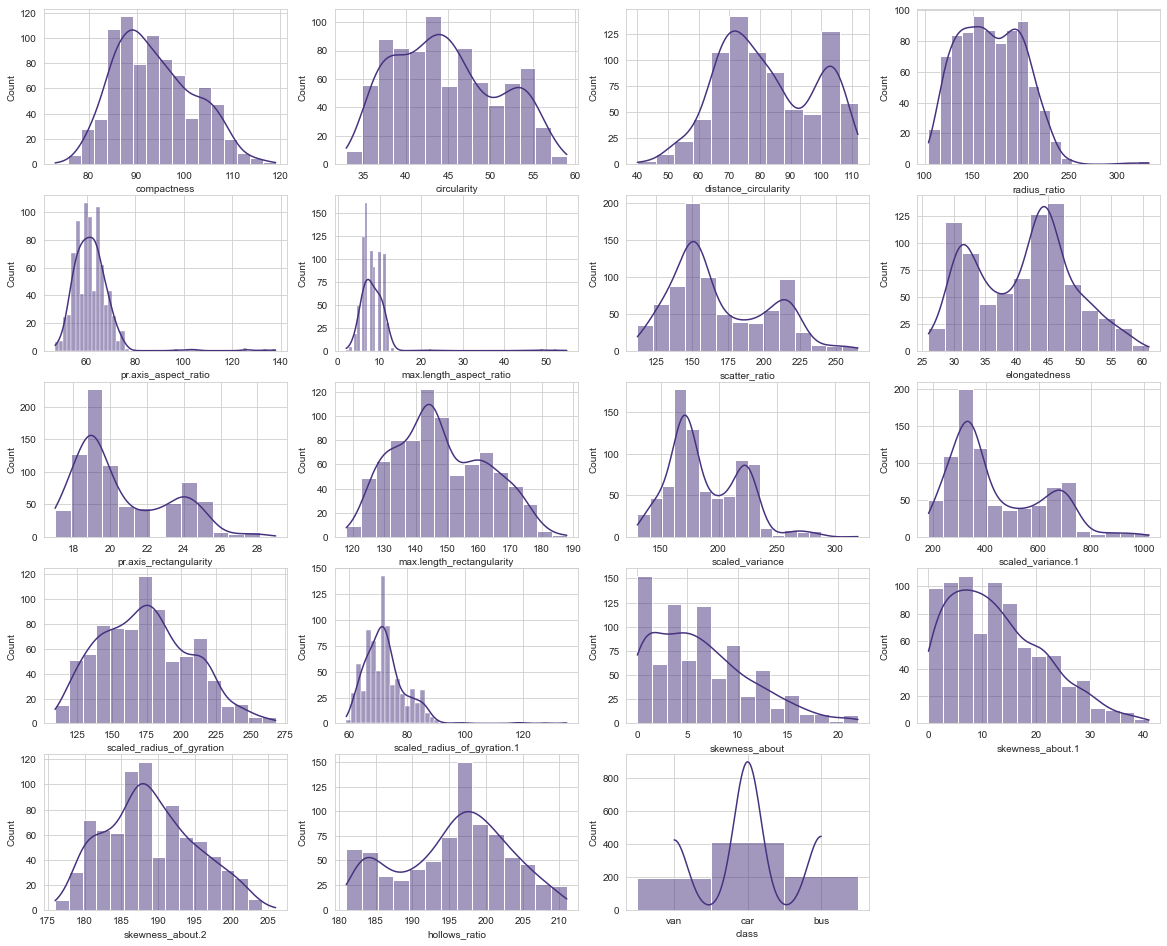

In [160]:
plt.figure(figsize=(20,20))
plt.subplot(6,4,1)
sns.histplot(df,x='compactness',kde=True)
plt.subplot(6,4,2)
sns.histplot(df,x='circularity',kde=True)
plt.subplot(6,4,3)
sns.histplot(df,x='distance_circularity',kde=True)
plt.subplot(6,4,4)
sns.histplot(df,x='radius_ratio',kde=True)
plt.subplot(6,4,5)
sns.histplot(df,x='pr.axis_aspect_ratio',kde=True)
plt.subplot(6,4,6)
sns.histplot(df,x='max.length_aspect_ratio',kde=True)
plt.subplot(6,4,7)
sns.histplot(df,x='scatter_ratio',kde=True)
plt.subplot(6,4,8)
sns.histplot(df,x='elongatedness',kde=True)
plt.subplot(6,4,9)
sns.histplot(df,x='pr.axis_rectangularity',kde=True)
plt.subplot(6,4,10)
sns.histplot(df,x='max.length_rectangularity',kde=True)
plt.subplot(6,4,11)
sns.histplot(df,x='scaled_variance',kde=True)
plt.subplot(6,4,12)
sns.histplot(df,x='scaled_variance.1',kde=True)
plt.subplot(6,4,13)
sns.histplot(df,x='scaled_radius_of_gyration',kde=True)
plt.subplot(6,4,14)
sns.histplot(df,x='scaled_radius_of_gyration.1',kde=True)
plt.subplot(6,4,15)
sns.histplot(df,x='skewness_about',kde=True)
plt.subplot(6,4,16)
sns.histplot(df,x='skewness_about.1',kde=True)
plt.subplot(6,4,17)
sns.histplot(df,x='skewness_about.2',kde=True)
plt.subplot(6,4,18)
sns.histplot(df,x='hollows_ratio',kde=True)
plt.subplot(6,4,19)
sns.histplot(df,x='class',kde=True)



plt.show()

# Conclusions on Univariate Analysis

1.Maximum no of compactness is 85-90.

2.Maximum no of circularity is 43.

3.Maximum no of distance_circularity is 70-75.

4.Maximum no of radius_ratio is 160.

5.Maximum no of pr.axis_aspect_ratio is 70.

6.Maximum no of max.length_aspect_ratio is 8.

7.Maximum no of scatter_ratio is 150.

8.Maximum no of elongatediness is 45.

9.Maximum no of pr.axis_rectangularity is 19.

10.Maximum no of max.length_rectangularity is 145.

11.Maximum no of scaled_variance is 160.

12.Maximum no of scaled_variance.1 is 350.

13.Maximum no of scaled_radius_of_gyration is 175.

14.Maximum no of scaled_radius_of_gyration.1 is 70.

15.Maximum no of skewness_about is 1.

16.Maximum no of skewness_about.1 is 8.

17.Maximum no of skewness_about.2 is 187.

18.Maximum no of hollows_ratio is 198.

19.Maximum no of class is car.

# Bivariate Analysis

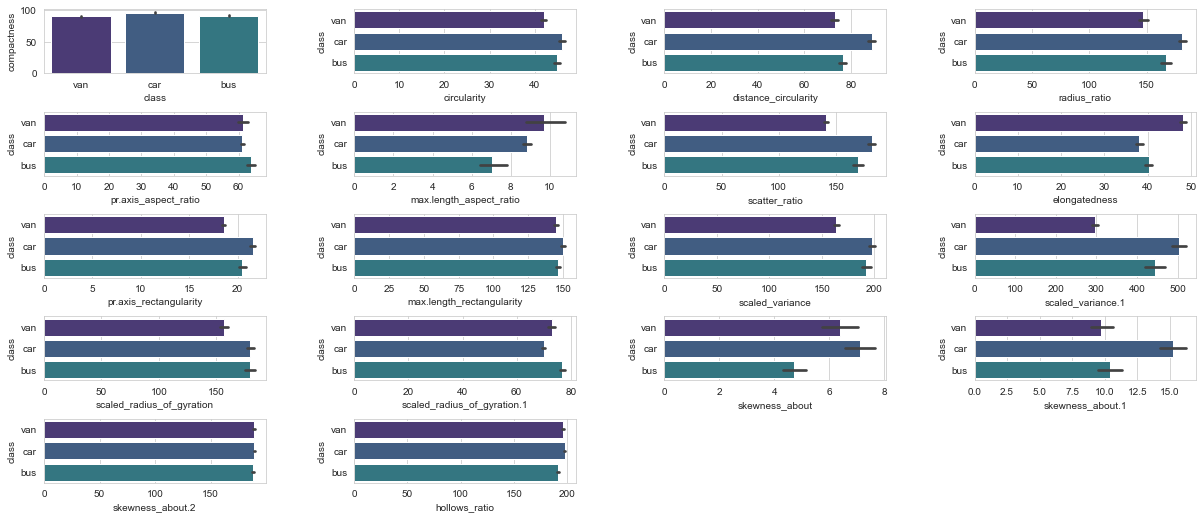

In [161]:
plt.figure(figsize=(20,10))
plt.subplot(6,4,1)
sns.barplot(data=df,x='class',y='compactness',)
plt.subplot(6,4,2)
sns.barplot(data=df,x='circularity',y='class')
plt.subplot(6,4,3)
sns.barplot(data=df,x='distance_circularity' ,y='class')
plt.subplot(6,4,4)
sns.barplot(data=df,x='radius_ratio' ,y='class')
plt.subplot(6,4,5)
sns.barplot(data=df,x='pr.axis_aspect_ratio',y='class')
plt.subplot(6,4,6)
sns.barplot(data=df,x='max.length_aspect_ratio' ,y='class')
plt.subplot(6,4,7)
sns.barplot(data=df,x='scatter_ratio' ,y='class')
plt.subplot(6,4,8)
sns.barplot(data=df,x='elongatedness' ,y='class')
plt.subplot(6,4,9)
sns.barplot(data=df,x='pr.axis_rectangularity' ,y='class')
plt.subplot(6,4,10)
sns.barplot(data=df,x='max.length_rectangularity',y='class')
plt.subplot(6,4,11)
sns.barplot(data=df,x='scaled_variance',y='class')
plt.subplot(6,4,12)
sns.barplot(data=df,x='scaled_variance.1',y='class')
plt.subplot(6,4,13)
sns.barplot(data=df,x='scaled_radius_of_gyration',y='class')
plt.subplot(6,4,14)
sns.barplot(data=df,x='scaled_radius_of_gyration.1',y='class')
plt.subplot(6,4,15)
sns.barplot(data=df,x='skewness_about',y='class')
plt.subplot(6,4,16)
sns.barplot(data=df,x='skewness_about.1',y='class')
plt.subplot(6,4,17)
sns.barplot(data=df,x='skewness_about.2',y='class')
plt.subplot(6,4,18)
sns.barplot(data=df,x='hollows_ratio',y='class')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.6)
plt.show()

# Conclusions on Bivariate Analysis

1.car has higher compactness.

2.car has higher circularity.

3.car has higher distance_circularity.

4.car has higher radius_ratio.

5.bus has higher pr.axis_aspect_ratio.

6.van has higher max.length_aspect_ratio.

7.car has higher scatter_ratio.

8.van has higher elongatedness.

9.car has higher pr.axis_rectangularity.

10.car has higher max.length_rectangularity.

11.car has higher scaled_variance.

12.car has higher scaled_variance.1.

13.car and bus has higher  scaled_radius_of_gyration.

14.bus has higher  scaled_radius_of_gyration.1.

15.car has higher skewness_about.

16.car has higher skewness_about.1

17.car,van and bus has same skewness_about.2.

18.car and van has higher hollows_ratio.

3. Classifier: Design and train a best fit SVM classier using all the data attributes.

In [162]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['class'] = label.fit_transform(df['class'])

In [163]:
X=df.iloc[:,:-1]
y=df.pop('class')

In [164]:
#splitting the data in test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

In [165]:
# scaling the data using the standard scaler
from sklearn.preprocessing import StandardScaler
X_train_sd = StandardScaler().fit_transform(X_train)
X_test_sd = StandardScaler().fit_transform(X_test)

In [166]:
from sklearn import svm

In [167]:
clf = svm.SVC(gamma=0.025, C=3)  

In [168]:
clf.fit(X_train_sd, y_train)

SVC(C=3, gamma=0.025)

In [169]:
y_pred = clf.predict(X_test_sd)

In [170]:
y_pred

array([1, 2, 2, 1, 1, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 1, 1, 0, 1, 1, 1, 0,
       0, 2, 2, 0, 1, 1, 1, 1, 1, 1, 2, 0, 1, 0, 2, 1, 2, 2, 1, 1, 1, 2,
       2, 0, 1, 1, 2, 2, 1, 1, 1, 1, 2, 0, 0, 1, 1, 2, 1, 1, 1, 1, 2, 0,
       1, 0, 2, 1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 0, 1, 2, 1, 1, 2, 1, 1, 0, 2,
       2, 1, 1, 2, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 2, 2, 2, 0, 1, 1, 1, 2,
       2, 0, 2, 0, 0, 1, 2, 1, 1])

In [171]:
from sklearn.metrics import accuracy_score

In [172]:
accuracy_score(y_test, y_pred)

0.9447852760736196

4. Dimensional reduction: perform dimensional reduction on the data.

In [173]:
covMatrix = np.cov(X_train_sd,rowvar=False)
print(covMatrix)

[[ 1.00154083  0.69265271  0.79068714  0.70614818  0.14703275  0.17675895
   0.81141356 -0.78672875  0.81048307  0.67859974  0.76814441  0.81717895
   0.59288604 -0.24587329  0.2331064   0.1566161   0.29895078  0.3585444 ]
 [ 0.69265271  1.00154083  0.80473489  0.63895245  0.18897602  0.27051785
   0.86183852 -0.83193301  0.85860179  0.96531692  0.81122683  0.85271926
   0.9422991   0.04695463  0.13424997 -0.01239352 -0.11637993  0.0432258 ]
 [ 0.79068714  0.80473489  1.00154083  0.7851747   0.21290146  0.29833771
   0.90704269 -0.91266146  0.89462213  0.7810356   0.86779548  0.88893252
   0.71713213 -0.22958526  0.10989015  0.26807135  0.14264479  0.33357443]
 [ 0.70614818  0.63895245  0.7851747   1.00154083  0.69173586  0.46017126
   0.7531609  -0.80356882  0.72563222  0.58662266  0.81128992  0.74073844
   0.5610937  -0.17612698  0.06504646  0.17028709  0.36117125  0.4565932 ]
 [ 0.14703275  0.18897602  0.21290146  0.69173586  1.00154083  0.64779696
   0.1525062  -0.22998495  0.12465

In [174]:
from sklearn.decomposition import PCA

In [175]:
pca = PCA(n_components=18)
pca.fit(X_train_sd)

PCA(n_components=18)

Eigen values

In [176]:
print(pca.explained_variance_)

[9.50747580e+00 3.00558025e+00 1.83608142e+00 1.16463397e+00
 9.51142786e-01 5.60787280e-01 3.41840201e-01 2.21006020e-01
 1.54593336e-01 8.53536546e-02 6.39870142e-02 4.56553316e-02
 3.56788417e-02 2.00434945e-02 1.50348751e-02 1.23626027e-02
 6.11954142e-03 3.58566341e-04]


Eigen vectors

In [177]:
print(pca.components_)

[[ 2.73460200e-01  2.94206998e-01  3.03608117e-01  2.71504470e-01
   9.73823943e-02  1.05254713e-01  3.15323368e-01 -3.12174746e-01
   3.12056516e-01  2.81056914e-01  3.08610931e-01  3.12459664e-01
   2.72919799e-01 -2.15441385e-02  4.08864876e-02  5.83073879e-02
   2.72139668e-02  7.29382123e-02]
 [-1.26863585e-01  1.26153277e-01 -7.32826132e-02 -1.81314952e-01
  -1.30707438e-01  2.05155738e-04  5.12832376e-02  1.02323798e-02
   6.47921552e-02  1.08463521e-01  6.32995688e-02  5.54828465e-02
   2.01562495e-01  4.88687476e-01 -6.53539189e-02 -1.06190120e-01
  -5.45648881e-01 -5.42361294e-01]
 [-1.16783974e-01 -3.02578526e-02 -5.50682144e-02  2.62835459e-01
   6.38592996e-01  5.96554839e-01 -1.06216475e-01  6.66155013e-02
  -1.18703251e-01 -8.75071692e-03  4.68626187e-02 -1.19219907e-01
  -3.54378168e-02  2.91847960e-01 -9.14788698e-02 -8.55416871e-02
  -2.77613490e-03  3.50949296e-02]
 [-7.29317599e-02 -1.95712092e-01  7.49553966e-02  5.36645143e-02
  -1.39530313e-02 -1.02324629e-02  9.

In [178]:
print(pca.explained_variance_ratio_)

[5.27380495e-01 1.66719793e-01 1.01847593e-01 6.46023458e-02
 5.27599716e-02 3.11069183e-02 1.89619052e-02 1.22592228e-02
 8.57530557e-03 4.73457452e-03 3.54936515e-03 2.53250515e-03
 1.97910840e-03 1.11181435e-03 8.33985807e-04 6.85754630e-04
 3.39451486e-04 1.98897056e-05]


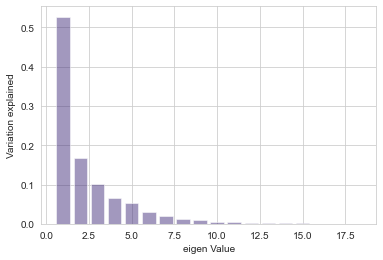

In [179]:
plt.bar(list(range(1,19)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

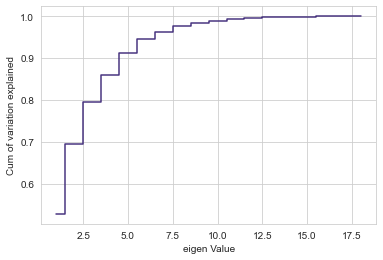

In [180]:
plt.step(list(range(1,19)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

# Dimensionality Reduction

Now 3 dimensions seems very reasonable. With 3 variables we can explain over 95% of the variation in the original data!

In [181]:
pca3 = PCA(n_components=8)
pca3.fit(X_train_sd)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(X_train_sd)

[[ 2.73460200e-01  2.94206998e-01  3.03608117e-01  2.71504470e-01
   9.73823943e-02  1.05254713e-01  3.15323368e-01 -3.12174746e-01
   3.12056516e-01  2.81056914e-01  3.08610931e-01  3.12459664e-01
   2.72919799e-01 -2.15441385e-02  4.08864876e-02  5.83073879e-02
   2.72139668e-02  7.29382123e-02]
 [-1.26863585e-01  1.26153277e-01 -7.32826132e-02 -1.81314952e-01
  -1.30707438e-01  2.05155738e-04  5.12832376e-02  1.02323798e-02
   6.47921552e-02  1.08463521e-01  6.32995688e-02  5.54828465e-02
   2.01562495e-01  4.88687476e-01 -6.53539189e-02 -1.06190120e-01
  -5.45648881e-01 -5.42361294e-01]
 [-1.16783974e-01 -3.02578526e-02 -5.50682144e-02  2.62835459e-01
   6.38592996e-01  5.96554839e-01 -1.06216475e-01  6.66155013e-02
  -1.18703251e-01 -8.75071692e-03  4.68626187e-02 -1.19219907e-01
  -3.54378168e-02  2.91847960e-01 -9.14788698e-02 -8.55416871e-02
  -2.77613490e-03  3.50949296e-02]
 [-7.29317599e-02 -1.95712092e-01  7.49553966e-02  5.36645143e-02
  -1.39530313e-02 -1.02324629e-02  9.

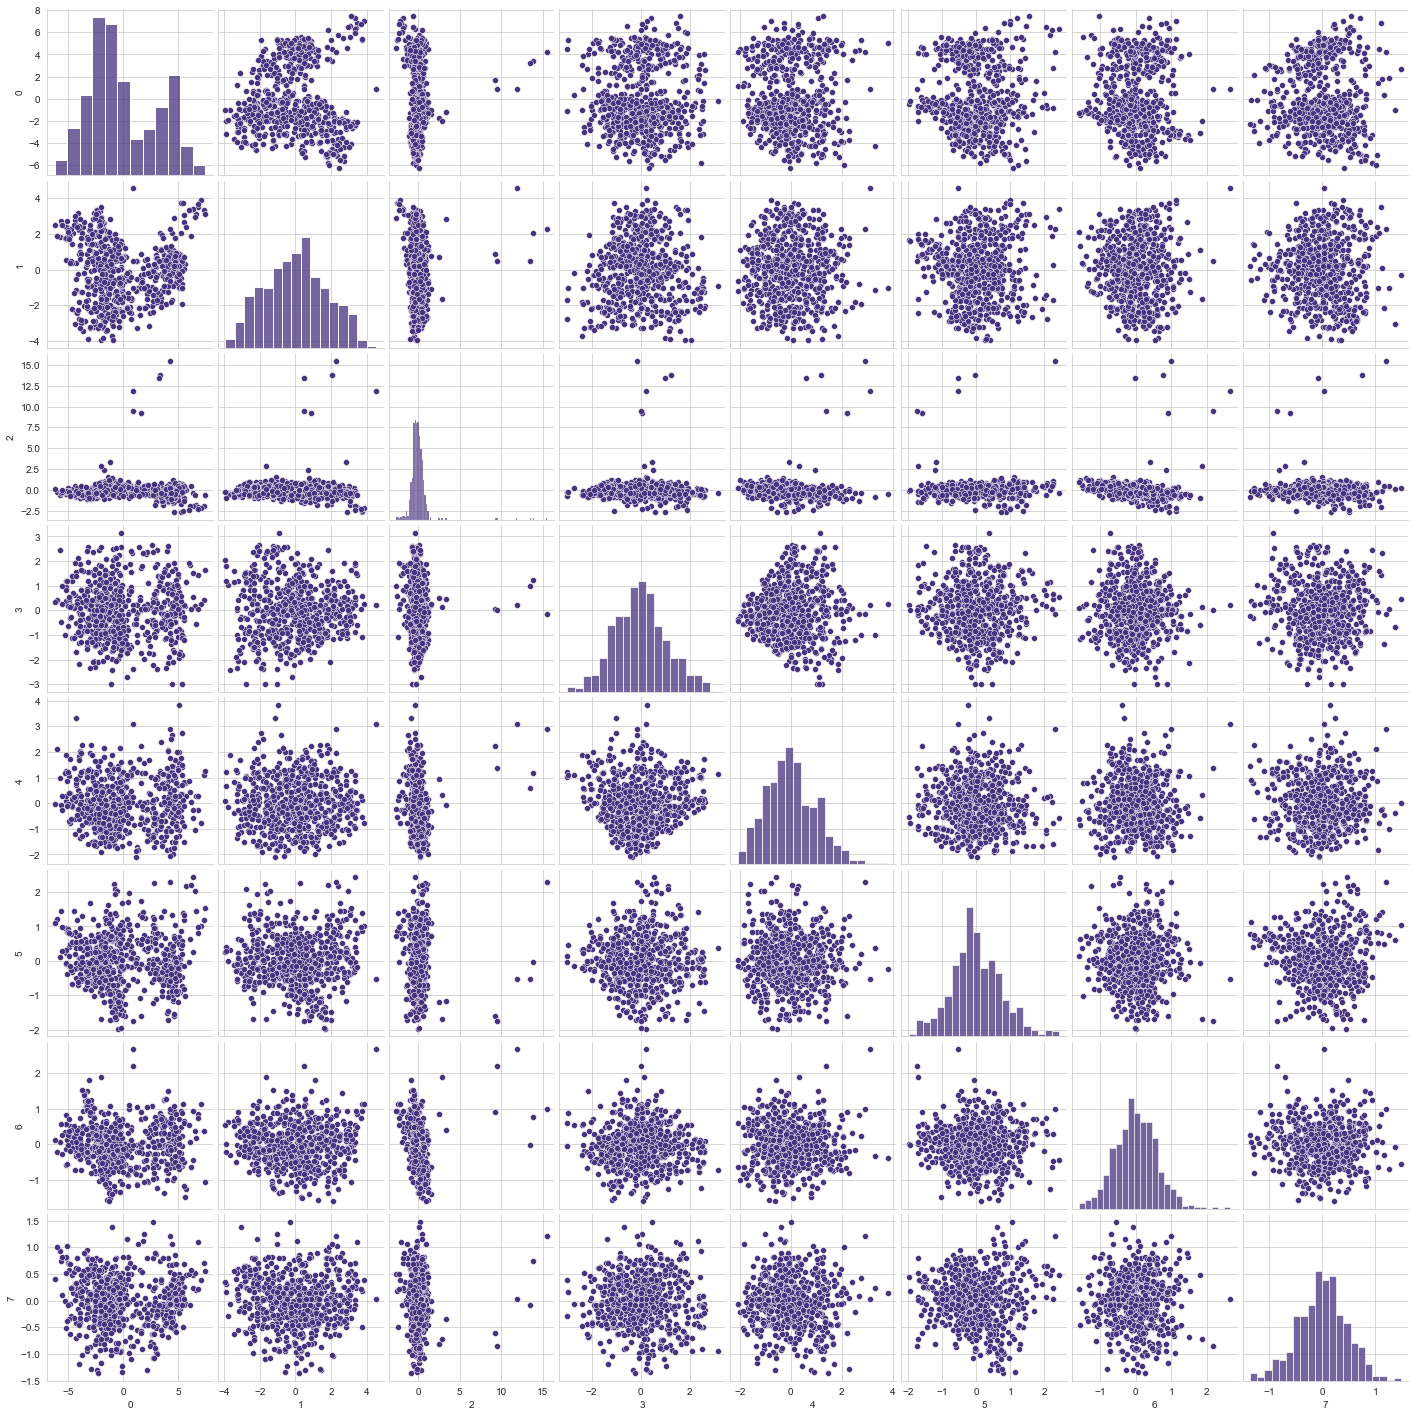

In [182]:
sns.pairplot(pd.DataFrame(Xpca3))

In [183]:
pca3.fit(X_test_sd)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca3_test = pca3.transform(X_test_sd)

[[-0.28005296 -0.29145157 -0.30695448 -0.25391073 -0.01663377 -0.07128722
  -0.32138296  0.31653672 -0.31911241 -0.28127809 -0.30982062 -0.32035903
  -0.25576489  0.04343864 -0.03669654 -0.08315255 -0.04746046 -0.10820658]
 [-0.12790166  0.1696874  -0.06461758 -0.12763004  0.06868272  0.17366492
   0.01759503  0.03036645  0.02722039  0.16565683  0.06756555  0.01890903
   0.24616327  0.51410572 -0.02870275 -0.17658785 -0.50975685 -0.49840542]
 [-0.09340299 -0.07233042 -0.04924423  0.36238553  0.63089433  0.52996275
  -0.06767329  0.01557363 -0.08493491 -0.08673012  0.10434994 -0.07337976
  -0.07018932  0.19885358 -0.18150014 -0.02114673  0.17993711  0.16534764]
 [ 0.09881002  0.16655586 -0.05493342  0.01078488  0.10186415  0.08884827
  -0.10232232  0.11073002 -0.08710761  0.15789476 -0.10891733 -0.08543279
   0.15657035 -0.07241758  0.70039154 -0.55604821  0.15610582  0.1132018 ]
 [ 0.03805452 -0.07904571  0.05768127 -0.0643237   0.00611221  0.23716475
  -0.02296758  0.08527081  0.00401

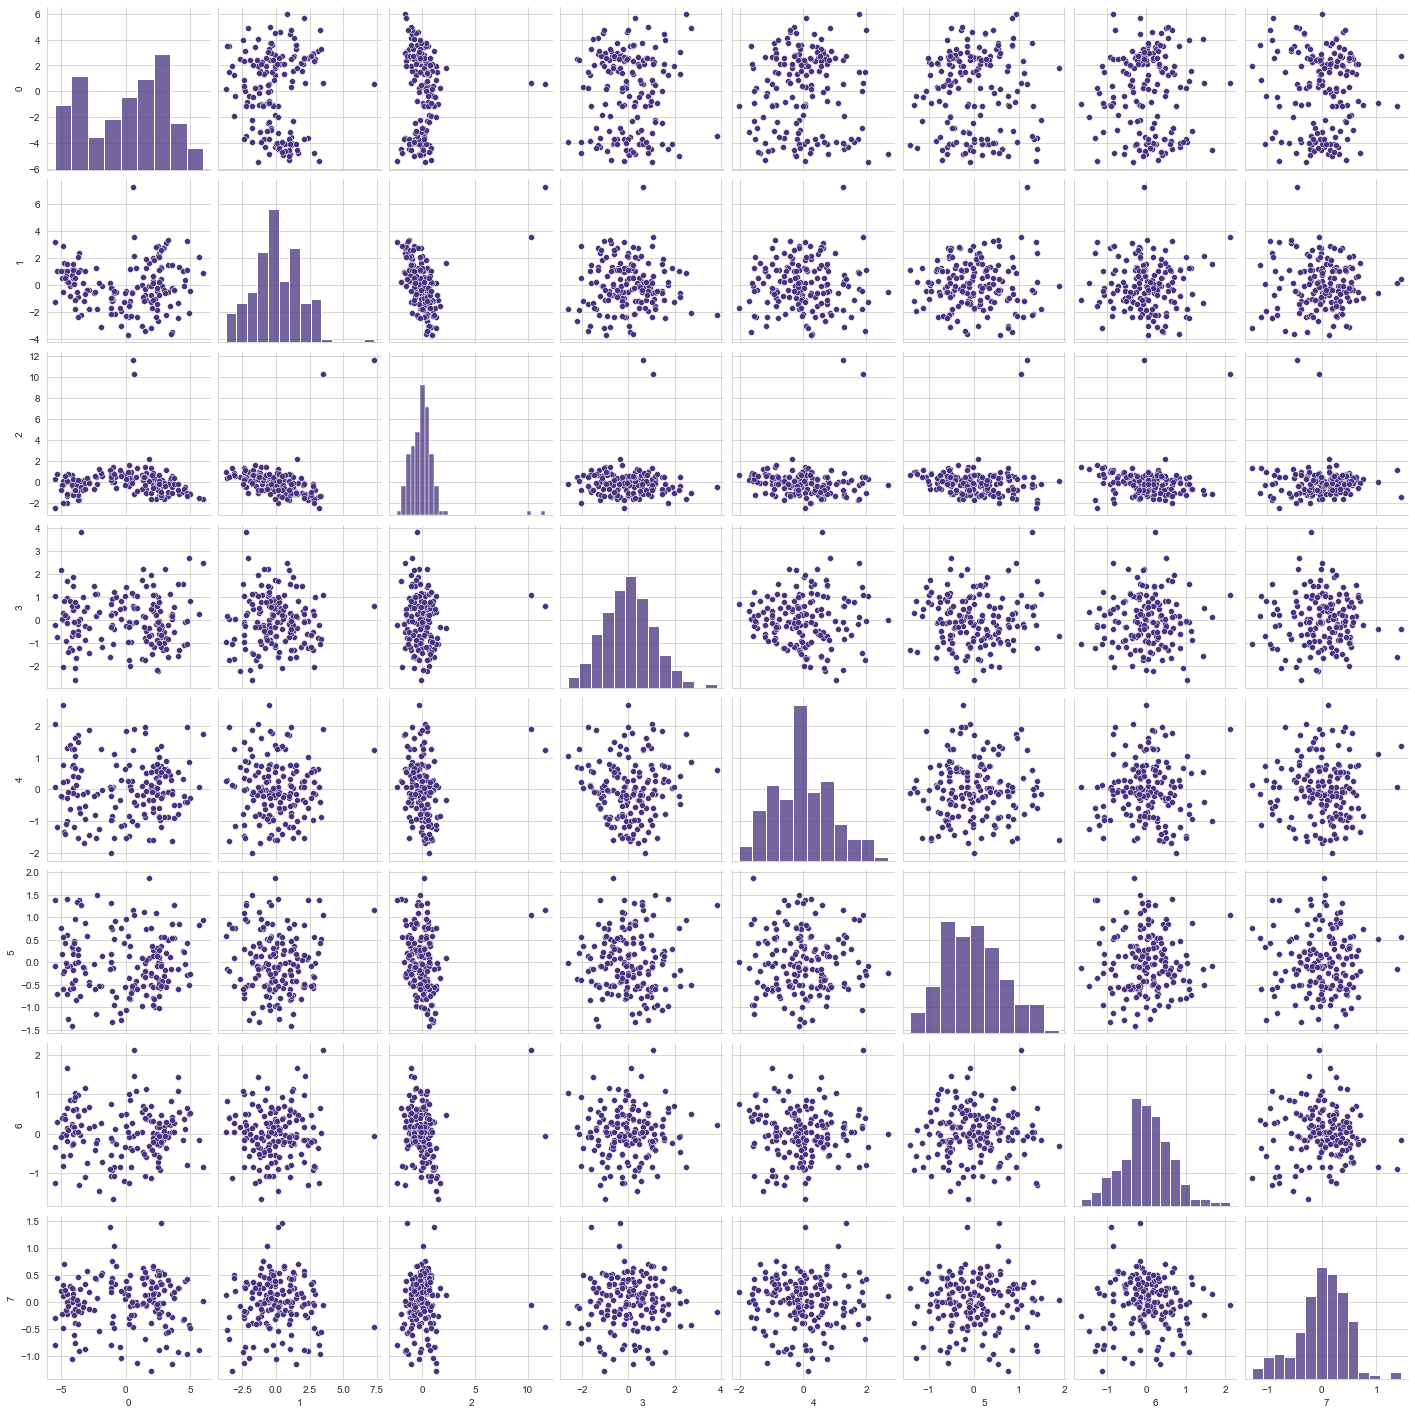

In [184]:
sns.pairplot(pd.DataFrame(Xpca3_test))

5. Classifier: Design and train a best fit SVM classier using dimensionally reduced attributes

In [185]:
clf.fit(X_train_sd, y_train)
print ('Before PCA score', clf.score(X_test_sd, y_test))

clf.fit(Xpca3, y_train)
print ('After PCA score', clf.score(Xpca3_test, y_test))

Before PCA score 0.9447852760736196
After PCA score 0.4171779141104294


In [186]:
y_pred = clf.predict(Xpca3_test)

In [187]:
accuracy_score(y_test, y_pred)

0.4171779141104294

6. Conclusion: Showcase key pointer on how dimensional reduction helped in this case.

Dimensional reduction helped in curse of dimensionality and eliminated overfitting but it reduced accuracy drastically.
Using PCA can lose some spatial information which is important for classification, so the classification accuracy decreases.


# PART FOUR

• DOMAIN: Sports management
• CONTEXT: Company X is a sports management company for international cricket.
• DATA DESCRIPTION: The data is collected belongs to batsman from IPL series conducted so far. Attribute Information:
1. Runs: Runs score by the batsman
2. Ave: Average runs scored by the batsman per match
3. SR: strike rate of the batsman
4. Fours: number of boundary/four scored
5. Six: number of boundary/six scored
6. HF: number of half centuries scored so far

• PROJECT OBJECTIVE: Goal is to build a data driven batsman ranking model for the sports management company to make business decisions.
Steps and tasks: [ Total Score: 5 points]
1. EDA and visualisation: Create a detailed performance report using univariate, bi-variate and multivariate EDA techniques. Find out all possible hidden
patterns by using all possible methods.

In [188]:
df=pd.read_csv("Part4 - batting_bowling_ipl_bat.csv")

In [189]:
df.shape

(180, 7)

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 1 to 179
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    90 non-null     object 
 1   Runs    90 non-null     float64
 2   Ave     90 non-null     float64
 3   SR      90 non-null     float64
 4   Fours   90 non-null     float64
 5   Sixes   90 non-null     float64
 6   HF      90 non-null     float64
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


In [191]:
df.head(5)

,Name,Runs,Ave,SR,Fours,Sixes,HF
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [192]:
df=df.dropna() #dropping null rows

In [193]:
df.head(5)

,Name,Runs,Ave,SR,Fours,Sixes,HF
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0


In [194]:
df.shape

(90, 7)

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 1 to 179
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    90 non-null     object 
 1   Runs    90 non-null     float64
 2   Ave     90 non-null     float64
 3   SR      90 non-null     float64
 4   Fours   90 non-null     float64
 5   Sixes   90 non-null     float64
 6   HF      90 non-null     float64
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


In [198]:
#statistical Analysis
df.describe()

,Runs,Ave,SR,Fours,Sixes,HF
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,219.933333,24.729889,119.164111,19.788889,7.577778,1.188889
std,156.253669,13.619215,23.656547,16.399845,8.001373,1.688656
min,2.000000,0.500000,18.180000,0.000000,0.000000,0.000000
25%,98.000000,14.665000,108.745000,6.250000,3.000000,0.000000
50%,196.500000,24.440000,120.135000,16.000000,6.000000,0.500000
75%,330.750000,32.195000,131.997500,28.000000,10.000000,2.000000
max,733.000000,81.330000,164.100000,73.000000,59.000000,9.000000


# Univariate Analysis

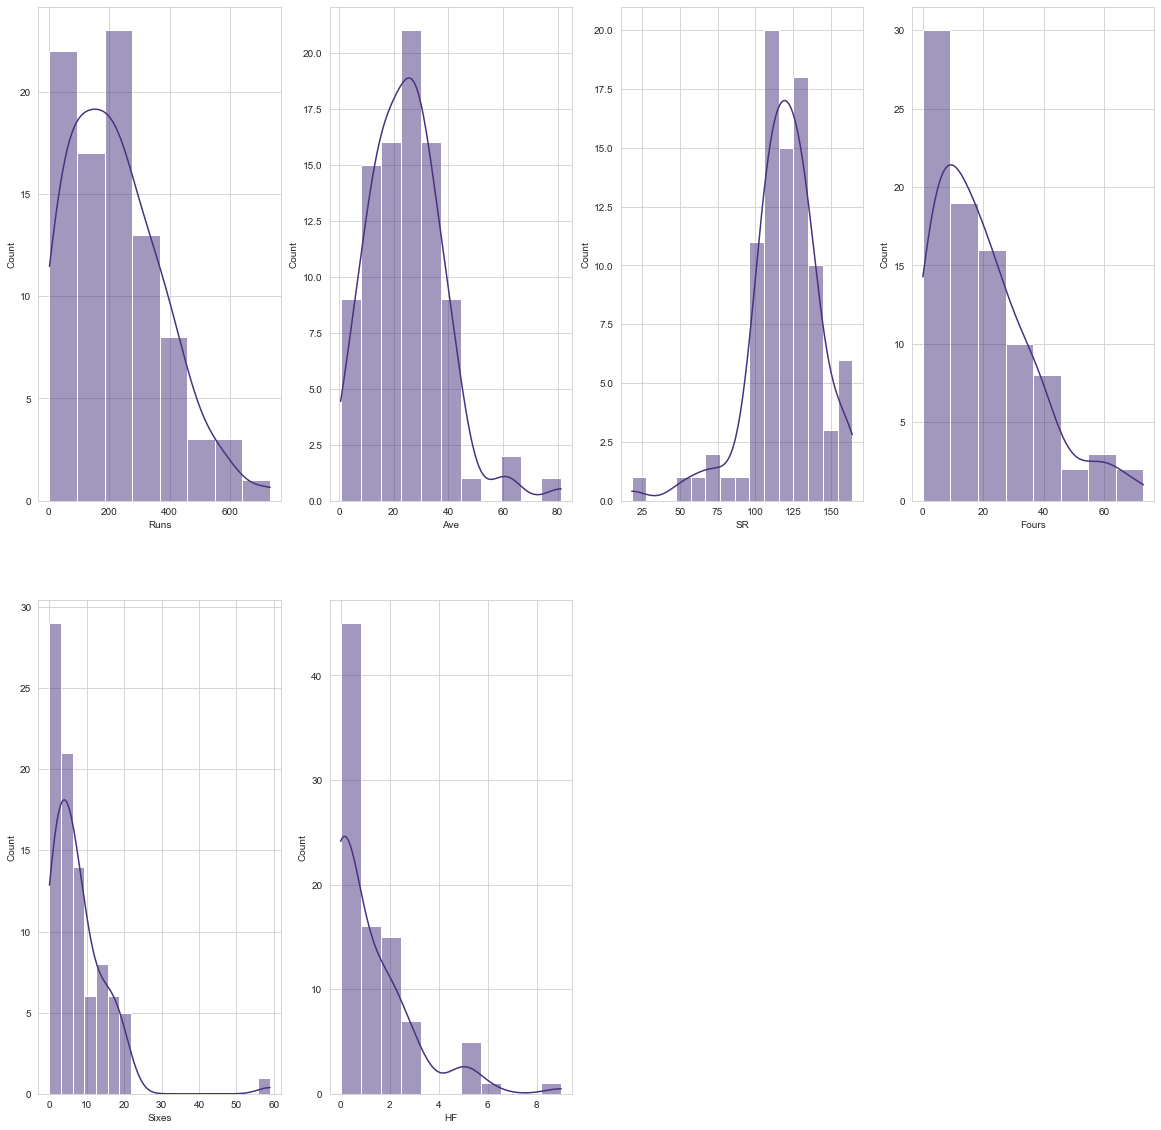

In [199]:
plt.figure(figsize=(20,20))
plt.subplot(2,4,1)
sns.histplot(df,x='Runs',kde=True)
plt.subplot(2,4,2)
sns.histplot(df,x='Ave',kde=True)
plt.subplot(2,4,3)
sns.histplot(df,x='SR',kde=True)
plt.subplot(2,4,4)
sns.histplot(df,x='Fours',kde=True)
plt.subplot(2,4,5)
sns.histplot(df,x='Sixes',kde=True)
plt.subplot(2,4,6)
sns.histplot(df,x='HF',kde=True)



plt.show()

# Conclusions on Univariate Analysis

1.Maximum no of players scored 300 runs.

2.Maximum no of players have average of 30.

3.Maximum no of players have 120 SR.

4.Maximum no of players have 10 fours.

5.Maximum no of players 5 sixes.

6.Maximum no of players 1 HF.

# Bivariate Analysis

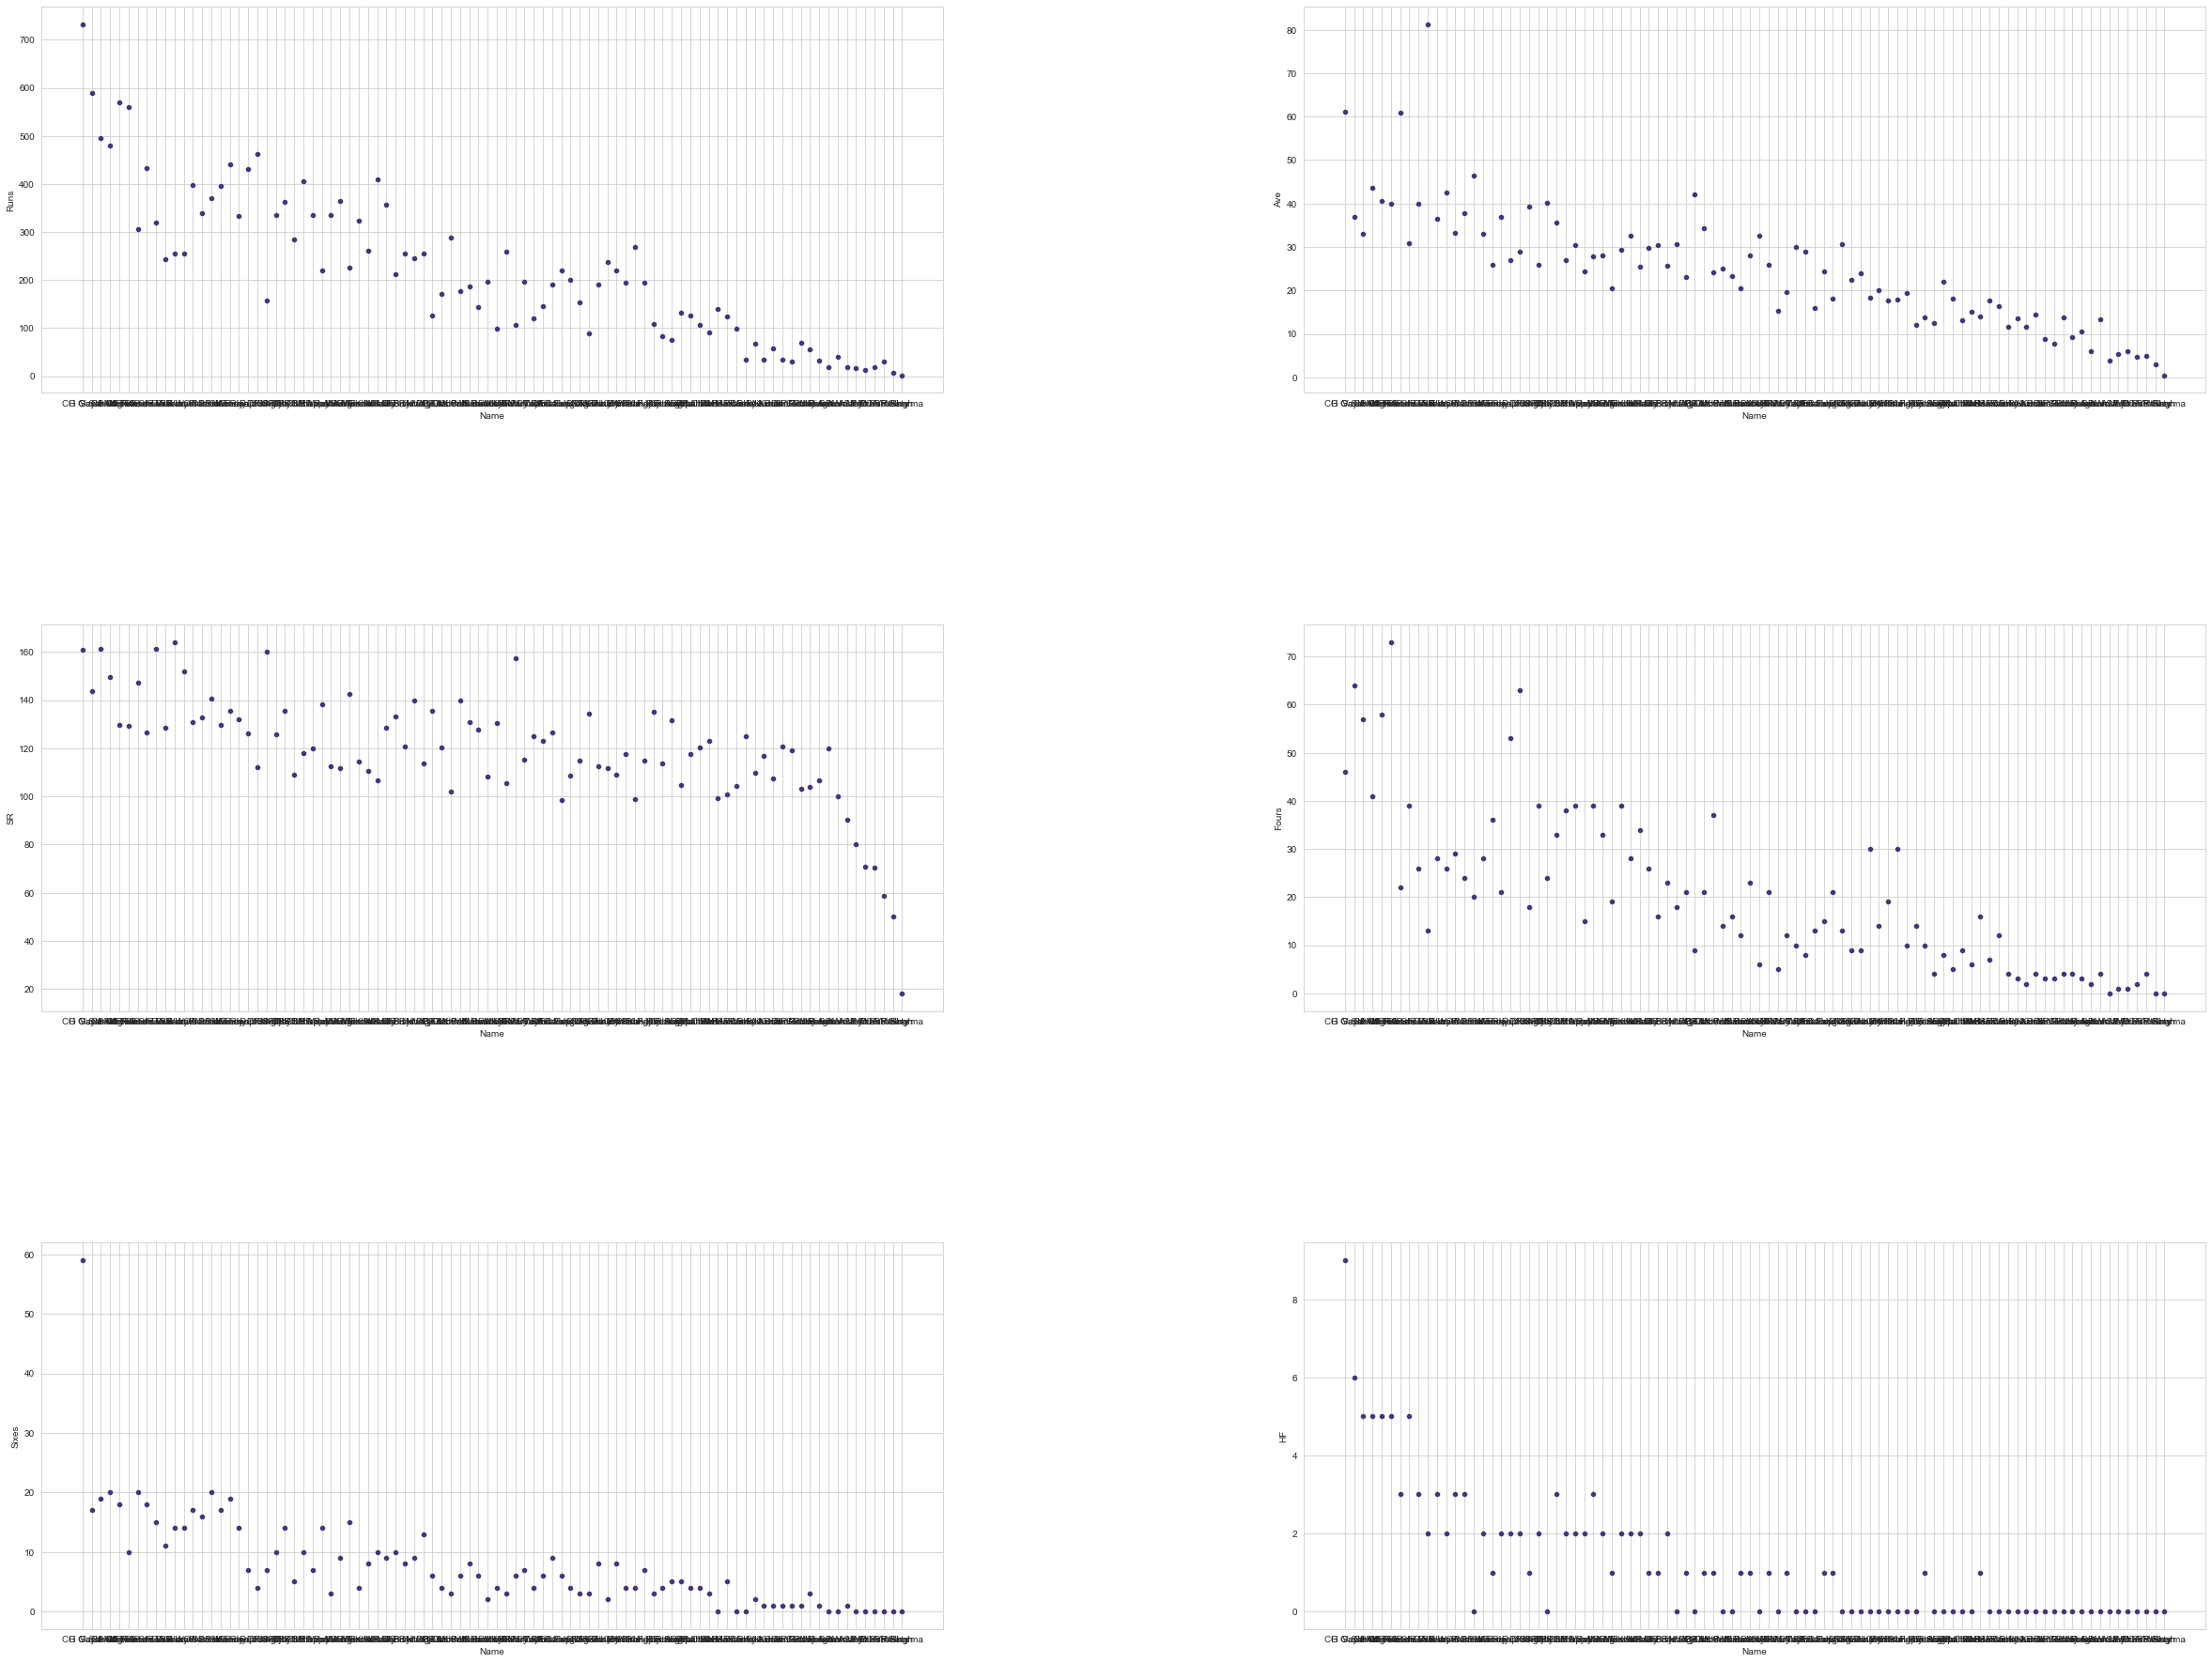

In [207]:
plt.figure(figsize=(40,30))
plt.subplot(3,2,1)
sns.scatterplot(data=df,x='Name',y='Runs')
plt.subplot(3,2,2)
sns.scatterplot(data=df,x='Name',y='Ave')
plt.subplot(3,2,3)
sns.scatterplot(data=df,x='Name' ,y='SR')
plt.subplot(3,2,4)
sns.scatterplot(data=df,x='Name' ,y='Fours')
plt.subplot(3,2,5)
sns.scatterplot(data=df,x='Name' ,y='Sixes')
plt.subplot(3,2,6)
sns.scatterplot(data=df,x='Name' ,y='HF')


plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.6)
plt.show()

Conclusion :
    All plots are right skewed for all name vs other columns.

# Multivariant Analysis

In [208]:
df.corr()

,Runs,Ave,SR,Fours,Sixes,HF
Runs,1.000000,0.692984,0.493489,0.918809,0.769778,0.835148
Ave,0.692984,1.000000,0.623606,0.546211,0.682414,0.620754
SR,0.493489,0.623606,1.000000,0.384810,0.583943,0.427584
Fours,0.918809,0.546211,0.384810,1.000000,0.522574,0.783689
Sixes,0.769778,0.682414,0.583943,0.522574,1.000000,0.767696
HF,0.835148,0.620754,0.427584,0.783689,0.767696,1.000000


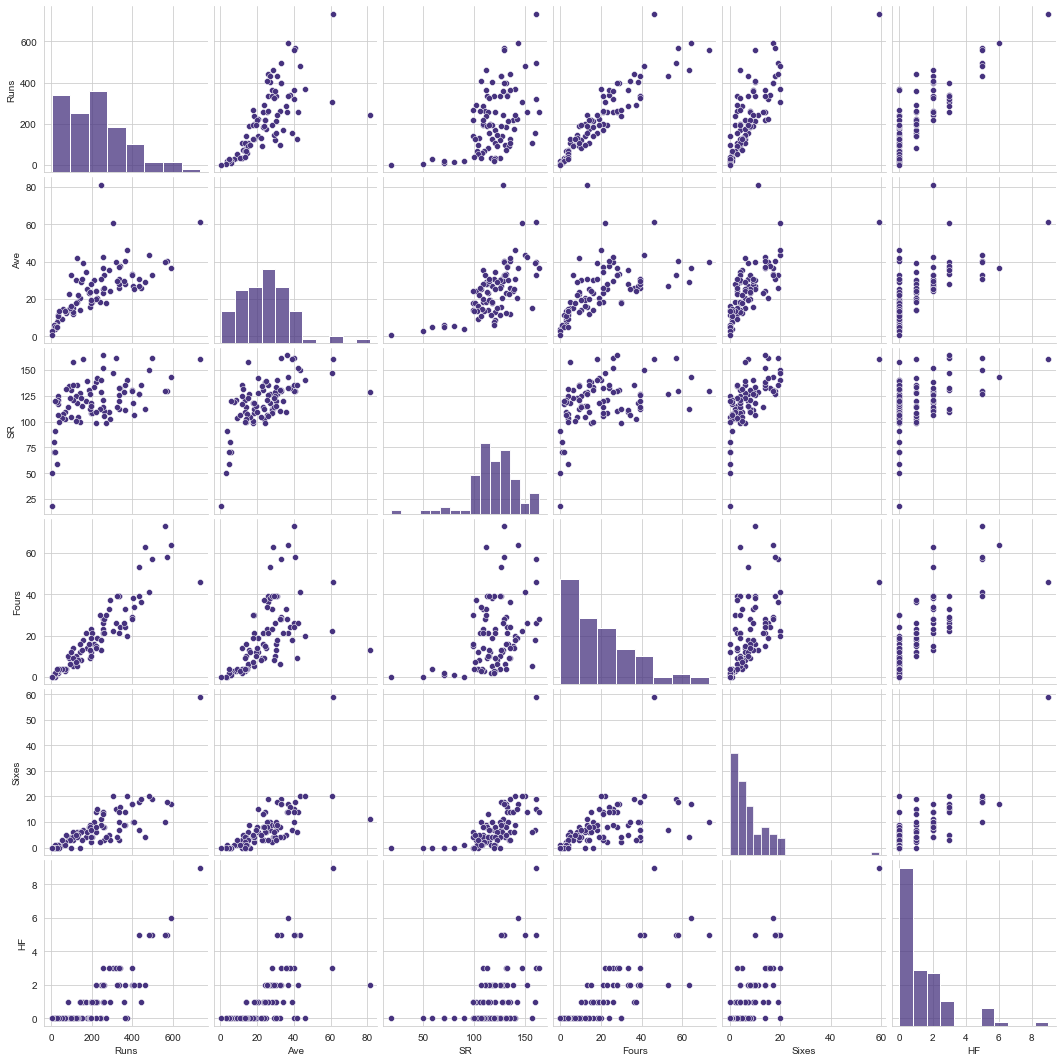

In [209]:
sns.pairplot(df)

<AxesSubplot:>

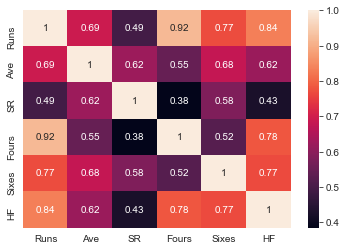

In [210]:
sns.heatmap(df.corr(), annot=True)  # plot the correlation coefficients as a heatmap

2. Build a data driven model to rank all the players in the dataset using all or the most important performance features

In [211]:
X=df.iloc[:,1:]

In [212]:
X

,Runs,Ave,SR,Fours,Sixes,HF
1,733.0,61.08,160.74,46.0,59.0,9.0
3,590.0,36.87,143.55,64.0,17.0,6.0
5,495.0,33.00,161.23,57.0,19.0,5.0
7,479.0,43.54,149.68,41.0,20.0,5.0
9,569.0,40.64,129.61,58.0,18.0,5.0
...,...,...,...,...,...,...
171,12.0,6.00,70.58,1.0,0.0,0.0
173,19.0,4.75,70.37,2.0,0.0,0.0
175,30.0,5.00,58.82,4.0,0.0,0.0
177,6.0,3.00,50.00,0.0,0.0,0.0


In [213]:
X_sd = StandardScaler().fit_transform(X)

In [214]:
covMatrix = np.cov(X_sd,rowvar=False)
print(covMatrix)

[[1.01123596 0.70077082 0.49903347 0.9291323  0.77842677 0.84453142]
 [0.70077082 1.01123596 0.63061271 0.55234856 0.69008186 0.62772842]
 [0.49903347 0.63061271 1.01123596 0.38913406 0.59050396 0.43238784]
 [0.9291323  0.55234856 0.38913406 1.01123596 0.52844526 0.79249429]
 [0.77842677 0.69008186 0.59050396 0.52844526 1.01123596 0.77632221]
 [0.84453142 0.62772842 0.43238784 0.79249429 0.77632221 1.01123596]]


In [219]:
pca = PCA(n_components=6)
pca.fit(X_sd)

PCA(n_components=6)

# Eigen values

In [220]:
print(pca.explained_variance_)

[4.30252561 0.83636692 0.41665751 0.32912443 0.16567829 0.01706297]


# Eigen vectors

In [221]:
print(pca.components_)

[[ 0.4582608   0.39797313  0.3253838   0.40574167  0.41733459  0.43237178]
 [ 0.26643209 -0.33111756 -0.69780334  0.47355804 -0.17902455  0.27593225]
 [-0.10977942  0.00550486 -0.45013448 -0.50823538  0.66942589  0.28082541]
 [-0.00520142  0.84736307 -0.43275029 -0.03252305 -0.24878157 -0.17811777]
 [ 0.45840889 -0.10122837 -0.11890348  0.09676885  0.39458014 -0.77486668]
 [ 0.70483594 -0.0606373   0.05624934 -0.58514214 -0.35786211  0.16096217]]


In [222]:
print(pca.explained_variance_ratio_)

[0.70911996 0.13784566 0.06867133 0.05424458 0.02730624 0.00281223]


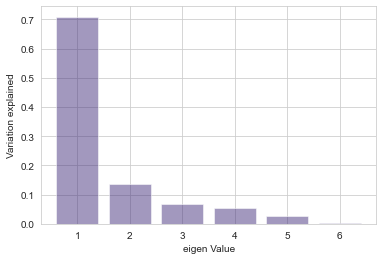

In [224]:
plt.bar(list(range(1,7)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

We can see 80% data can be explained by 2 pcas

# Dimensionality Reduction

In [225]:
pca3 = PCA(n_components=3)
pca3.fit(X_sd)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(X_sd)

[[ 0.4582608   0.39797313  0.3253838   0.40574167  0.41733459  0.43237178]
 [ 0.26643209 -0.33111756 -0.69780334  0.47355804 -0.17902455  0.27593225]
 [-0.10977942  0.00550486 -0.45013448 -0.50823538  0.66942589  0.28082541]]
[0.70911996 0.13784566 0.06867133]


In [230]:
Eigen_values=pca3.explained_variance_

In [231]:
Eigen_vector=pca3.components_

In [232]:
Eigen_values

array([4.30252561, 0.83636692, 0.41665751])

In [233]:
Eigen_vector

array([[ 0.4582608 ,  0.39797313,  0.3253838 ,  0.40574167,  0.41733459,
         0.43237178],
       [ 0.26643209, -0.33111756, -0.69780334,  0.47355804, -0.17902455,
         0.27593225],
       [-0.10977942,  0.00550486, -0.45013448, -0.50823538,  0.66942589,
         0.28082541]])

In [234]:
PC1_score=Eigen_values[0]*Eigen_vector[0]

In [235]:
PC1_score

array([1.97167881, 1.7122896 , 1.39997211, 1.74571392, 1.79559275,
       1.86029064])

In [236]:
PC2_score=Eigen_values[1]*Eigen_vector[1]

In [237]:
PC3_score=Eigen_values[2]*Eigen_vector[2]

In [239]:
score1=sum(PC1_score,PC2_score)

In [240]:
score1

array([10.70837282, 10.20860206,  9.90191821, 10.88160611, 10.33580762,
       10.71631844])

In [241]:
score=sum(score1,PC3_score)

In [242]:
score

array([62.70688484, 62.7549189 , 62.56507335, 62.54086517, 63.03154658,
       62.86963327])

In [243]:
sum(score)

376.4689221061639

In [244]:
Xpca3

array([[ 8.51677407e+00, -3.54574790e-01,  3.67247379e+00],
       [ 4.61833957e+00,  1.47672990e+00, -5.03630409e-01],
       [ 4.14225050e+00,  4.71438127e-01, -5.57203691e-01],
       [ 3.89941107e+00,  4.18155493e-02,  2.62142570e-01],
       [ 4.12007165e+00,  1.40100174e+00, -1.16643358e-01],
       [ 4.02443639e+00,  2.02508191e+00, -1.24570599e+00],
       [ 2.87928084e+00, -1.49435388e+00,  6.94594522e-01],
       [ 2.91901518e+00,  9.43018299e-01,  6.25199276e-01],
       [ 2.32738860e+00, -1.13355142e+00, -1.32685650e-01],
       [ 2.08164241e+00, -1.75793775e+00,  4.64028502e-01],
       [ 2.08328069e+00, -1.16901158e+00, -2.93189475e-01],
       [ 1.77694308e+00, -1.17265902e+00, -1.59240581e-01],
       [ 2.12516667e+00,  1.03583873e-01,  4.61217077e-01],
       [ 1.93887249e+00, -2.87326352e-01,  5.39590878e-01],
       [ 1.72763623e+00, -1.37253008e+00,  3.32953899e-01],
       [ 1.81713174e+00, -5.69579415e-02,  3.47352781e-01],
       [ 1.86989515e+00,  4.19705512e-02

In [245]:
df3=pd.DataFrame(Xpca3)

In [246]:
df3

,0,1,2
0,8.516774,-0.354575,3.672474
1,4.618340,1.476730,-0.503630
2,4.142251,0.471438,-0.557204
3,3.899411,0.041816,0.262143
4,4.120072,1.401002,-0.116643
...,...,...,...
85,-3.006639,0.972067,0.818102
86,-3.000751,1.049898,0.785502
87,-3.070959,1.463324,0.936508
88,-3.422022,1.616542,1.246073


In [248]:
df3['Name']=df['Name']

In [249]:
df3

,0,1,2,Name
0,8.516774,-0.354575,3.672474,NaN
1,4.618340,1.476730,-0.503630,CH Gayle
2,4.142251,0.471438,-0.557204,NaN
3,3.899411,0.041816,0.262143,G Gambhir
4,4.120072,1.401002,-0.116643,NaN
...,...,...,...,...
85,-3.006639,0.972067,0.818102,Azhar Mahmood
86,-3.000751,1.049898,0.785502,NaN
87,-3.070959,1.463324,0.936508,MK Pandey
88,-3.422022,1.616542,1.246073,NaN


In [253]:
df3=df3.dropna()

In [256]:
df3['Score']= df3.iloc[:, -4:-1].sum(axis=1)

In [262]:
df3['Rank'] = df3['Score'].rank(ascending=False)

In [264]:
df4=df3.sort_values(by=['Rank'])

In [269]:
df4.columns

Index([0, 1, 2, 'Name', 'Score', 'Rank'], dtype='object')

In [274]:
df=df4.iloc[:,3:]

In [275]:
df #ranked players based on pca

,Name,Score,Rank
1,CH Gayle,5.591439,1.0
5,V Sehwag,4.803812,2.0
7,CL White,4.487233,3.0
3,G Gambhir,4.203369,4.0
19,JP Duminy,2.278807,5.0
13,KP Pietersen,2.191137,6.0
15,RG Sharma,2.107527,7.0
23,SR Watson,1.737739,8.0
27,OA Shah,1.690177,9.0
21,DA Warner,1.423039,10.0


# PART FIVE

 Questions: [ Total Score: 5 points]
1. List down all possible dimensionality reduction techniques that can be implemented using python

1 Missing Value Ratio

2 Low Variance Filter

3 High Correlation Filter

4 Random Forest

5 Backward Feature Elimination

6 Forward Feature Selection

7 Factor Analysis

8 Principal Component Analysis

9 Independent Component Analysis

10 Methods Based on Projections

11 t-Distributed Stochastic Neighbor Embedding (t-SNE)

2. So far you have used dimensional reduction on numeric data. Is it possible to do the same on a multimedia data [images and video] and
text data ? Please illustrate your findings using a simple implementation on python.

In [276]:
X = np.load('X.npy')


In [277]:
X.shape

(2062, 64, 64)

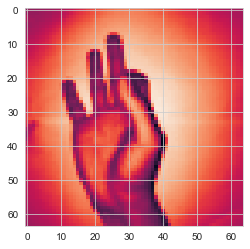

In [278]:
plt.imshow(X[0])

In [279]:
X_flat = np.array(X).reshape((2062, 64*64))

In [288]:
k_means = KMeans(n_clusters = 2)  

In [289]:
k_means.fit(X_flat)

KMeans(n_clusters=2)

In [290]:
labels = k_means.labels_

In [291]:
silhouette_score(X_flat,labels)

0.20308085

In [300]:
pca3 = PCA(n_components=5)

In [301]:
pca3.fit(X_flat)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca3_test = pca3.transform(X_flat)

[[ 0.03167032  0.03119406  0.03071639 ...  0.02742131  0.02754215
   0.02776823]
 [ 0.00608765  0.0060797   0.00603567 ... -0.00230008 -0.00208687
  -0.00190032]
 [ 0.013865    0.01365158  0.01356095 ...  0.00121995  0.00160566
   0.00190723]
 [ 0.00249397  0.00245323  0.00254082 ...  0.00745278  0.00733505
   0.00722907]
 [ 0.00961485  0.00963912  0.0096627  ...  0.01100598  0.01108907
   0.01120296]]
[0.12000257 0.07080333 0.04303718 0.04136792 0.03782486]


In [302]:
k_means.fit(Xpca3_test)

KMeans(n_clusters=2)

In [303]:
labels = k_means.labels_

In [304]:
silhouette_score(X_flat,labels)

0.20567101

In [305]:
X_reduced = pca.fit_transform(X_flat)

In [306]:
X_recovered = pca.inverse_transform(X_reduced)

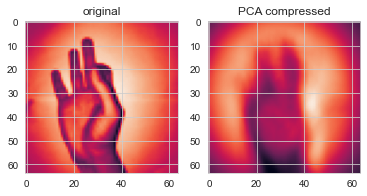

In [307]:
f = plt.figure()
f.add_subplot(1,2, 1)
plt.title("original")
plt.imshow(X_flat[0].reshape((64,64)))
f.add_subplot(1,2, 2)

plt.title("PCA compressed")
plt.imshow(X_recovered[0].reshape((64,64)))
plt.show(block=True)

Conclusions: Used pca on image and there is a difference classification.